###### Title: Analysis of Attributes Relating to User Knowledge Levels In a DC Machine Dataset.

Introduction:

<li> Background Information </li>

Knowledge modeling is the process of creating a model of knowledge and/or specifications for a particular process, structure, or entity that is interpretable by a computer. In this case, the dataset models knowledge of students in the field of electrical DC machines that convert direct current electrical energy into mechanical energy through various measures such as study time and study repetition through modeling methods. DC machines are used in applications where a wide range of speeds and precise good regulation is a requirement alongside widespread use of AC machines which use alternating current. <br>

<li> Statement of the Question We Wish to Answer </li>
Which attributes out of the ones given, best predict user knowledge level (UNS) and how are those attributes correlated amongst themselves?
<br><br>

<li> Description of the Dataset </li>
The User Knowledge Modeling Data Set is found in the UCI Machine Learning Repository and was created by Hamdi Tolga Kahraman, Ilhami Colak, and Seref Sagiroglu in 2009. This data set has 258 rows and contains data of the students' knowledge in the field of electrical DC Machines. It has 6 columns, 5 input attributes (quantitative) and 1 target attribute (qualitative). The authors classified the UNS based on the K-nearest neighbour algorithm, also known as K-NN. Descriptions of attributes are listed in the table below: 

<table style="width:100%">
  <tr>
    <th>Attribute</th>
    <th>Description</th>
    <th>Example</th>
  </tr>
  <tr>
    <td>STG</td>
    <td>The degree of study time for goal object materials.</td>
    <td>0, 0.18, 0.276</td>
  </tr>
  <tr>
    <td>SCG</td>
    <td>The degree of repetition number of user for goal object materials. </td>
    <td>0.3, 0.52, 0.259</td>
  </tr>
   <tr>
    <td>STR</td>
    <td>The degree of study time of user for related objects with goal object. </td>
    <td>0.12, 0.78, 0.59</td>
  </tr>
    <tr>
    <td>LPR</td>
    <td>The exam performance of user for related objects with goal object.</td>
    <td>0.65, 0.81, 0.2</td>
  </tr>
    <tr>
    <td>PEG</td>
    <td>The exam performance of user for goal objects. </td>
    <td>0, 0.9, 0.66</td>
  </tr>
    <tr>
    <td>UNS</td>
    <td>The knowledge level of user. </td>
    <td>“Very Low”, “Low”, “Middle”, “High”</td>
  </tr>
</table>



Preliminary exploratory data analysis:

In [1]:
install.packages("ggridges")
library(tidyverse)
library(repr)
library(readxl)
library(GGally)
library (tidymodels)
library(ggplot2)
library(ggridges)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ re

<li> Demonstrate that the dataset can be read from the web into R and combine 2 sheets </li>

In [18]:
#download file here, look for code

user_knowledge_data1 <- read_excel("data/Data_User_Modeling_Dataset.xls", sheet = 2)
user_knowledge_data2 <- read_excel("data/Data_User_Modeling_Dataset.xls", sheet = 3)
user_knowledge_data1$UNS <- as.character(user_knowledge_data1$UNS)
user_knowledge_data1$UNS[user_knowledge_data1$UNS == "very_low"] <- "Very Low"

user_knowledge_data <- rbind (user_knowledge_data1,user_knowledge_data2)

user_knowledge_data <- user_knowledge_data %>%
        mutate(UNS = as_factor(UNS))

head(user_knowledge_data)

New names:
* `` -> ...7
* `` -> ...8

New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>,<lgl>,<chr>
0.00,0.00,0.00,0.00,0.00,Very Low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.08,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.06,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.10,0.10,0.15,0.65,0.30,Middle,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.08,0.08,0.08,0.98,0.24,Low,NA,NA,PEG (The exam performance of user for goal objects)
0.09,0.15,0.40,0.10,0.66,Middle,NA,NA,UNS (The knowledge level of user)


<li> Demonstrate the cleaning and wrangling of the data into a tidy format </li>

In [19]:
user_knowledge_data_selected <- select(user_knowledge_data, STG:UNS) 
head(user_knowledge_data_selected)

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,Very Low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


<li> Randomize the dataset and split it into training and testing data </li>

In [7]:
set.seed(2000)

knowledge_data_split <- initial_split(user_knowledge_data_randomized, prop = 0.75, strata = UNS )
knowledge_data_training <- training(knowledge_data_split)   
knowledge_data_testing <- testing(knowledge_data_split)  

head(knowledge_data_training)
head(knowledge_data_testing)



STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.27,0.100,0.10,0.70,0.25,Low
0.15,0.275,0.80,0.21,0.81,High
0.09,0.550,0.12,0.78,0.05,Low
0.68,0.610,0.34,0.31,0.23,Low
0.68,0.190,0.19,0.48,0.10,Very Low
0.43,0.450,0.27,0.27,0.89,High


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.37,0.070,0.10,0.41,0.30,Low
0.49,0.340,0.88,0.75,0.71,High
0.20,0.200,0.70,0.30,0.60,Middle
0.76,0.258,0.07,0.83,0.34,Middle
0.30,0.320,0.43,0.87,0.83,High
0.31,0.320,0.29,0.31,0.96,High


The 75:25 data split was chosen to ensure that the training set had enough data to inform a robust model, the training set still having enough observations to be of a sufficient size due to the dataset being large.

<li> Summarize the training data based on the total count of observations and the average of each attribute </li>

In [20]:
user_knowledge_data_selected_summarize <- user_knowledge_data_selected %>% 
group_by(UNS) %>%
summarize(Count = n(), Average_STG = mean(STG), Average_SCG = mean(SCG), Average_STR = mean(STR), Average_LPR = mean(LPR), Average_PEG = mean(PEG))
user_knowledge_data_selected_summarize

`summarise()` ungrouping output (override with `.groups` argument)



UNS,Count,Average_STG,Average_SCG,Average_STR,Average_LPR,Average_PEG
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Very Low,50,0.2591800,0.2619000,0.3540000,0.2688200,0.0958000
High,102,0.4069020,0.4305000,0.5097549,0.5429412,0.7998039
Low,129,0.3267829,0.3227984,0.4249612,0.4493023,0.2535891
Middle,122,0.3745738,0.3671885,0.4911475,0.3856557,0.5313934


Our analysis will attempt to find attributes with the least overlap between their distributions for knowledge levels (UNS) as so to act as good predictors in distinguishing between the 4 levels. Summarizing the total observation count gives us an idea of the size of the dataset and the appropriateness of our split ratio while summarizing the means of the values for each attribute per knowledge level allows for quick assement of the biggest differences to identify trends in which attributes have the least overlap.


<li> Visualize training data </li>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



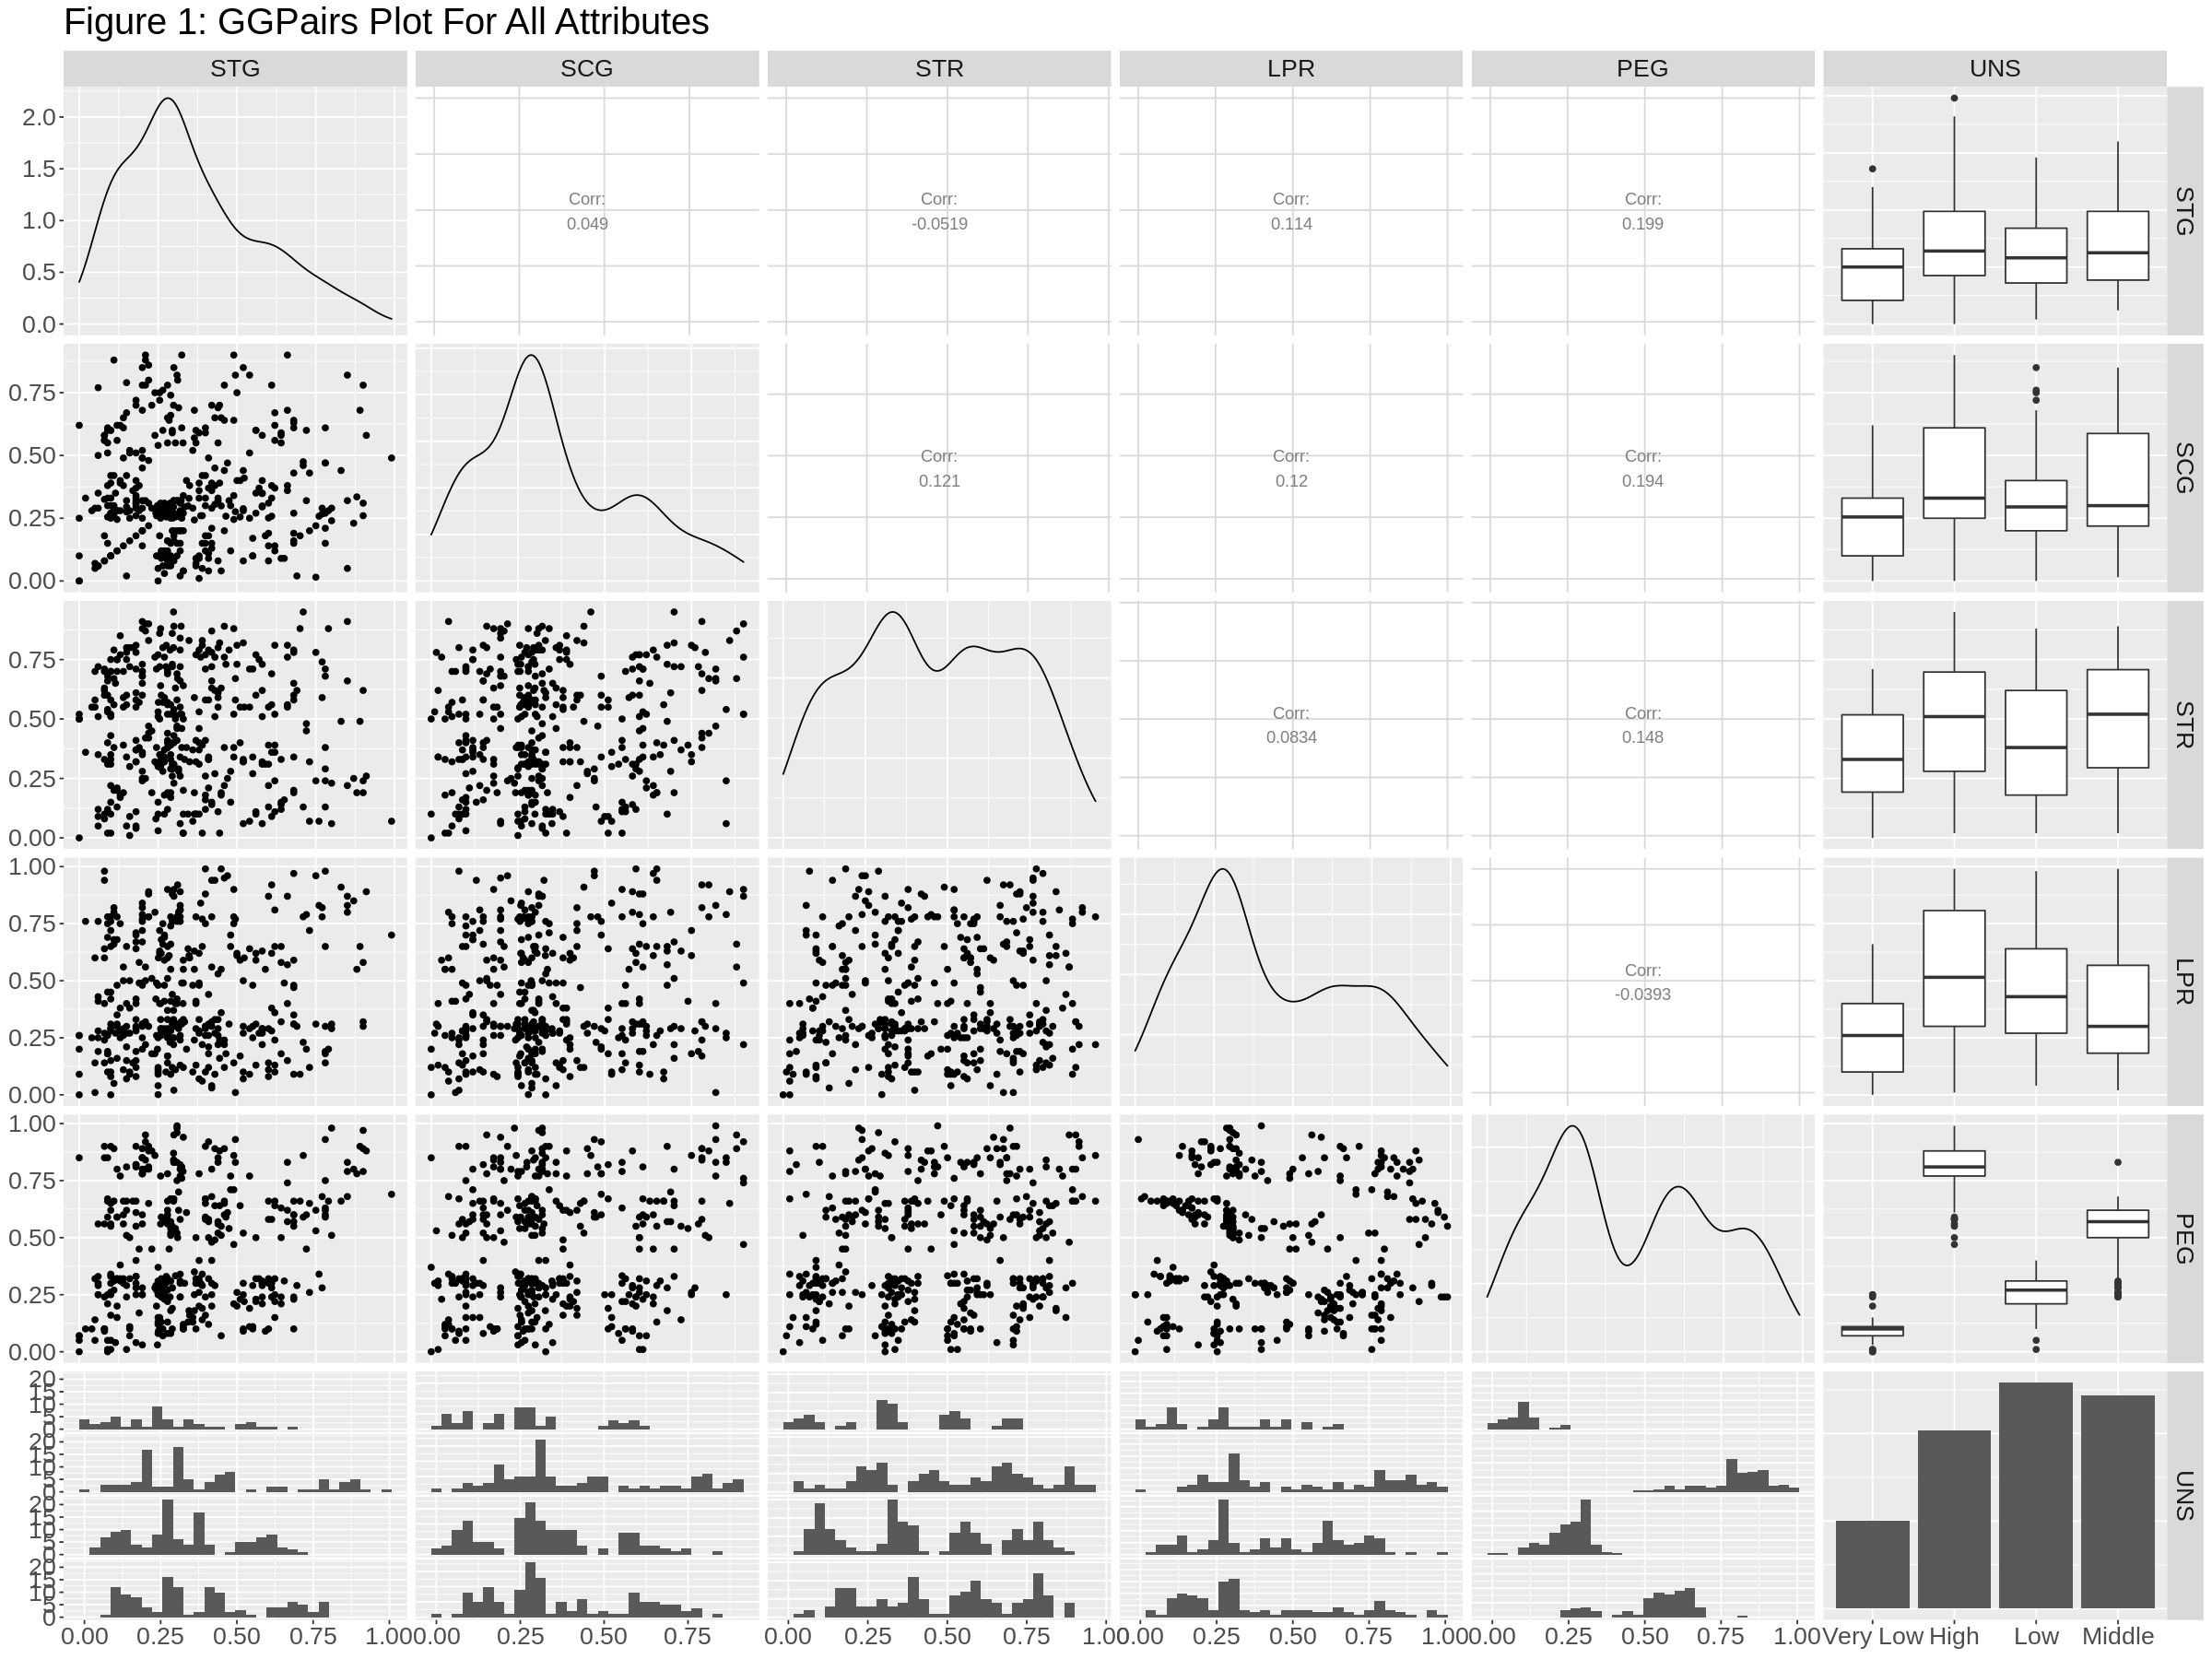

In [21]:
options(repr.plot.width = 20, repr.plot.height = 15) 
knowledge_plot_pairs <- user_knowledge_data_randomized %>%
                          ggpairs() + 
                          ggtitle ("Figure 1: GGPairs Plot For All Attributes") +
                          theme(text = element_text(size = 20))
knowledge_plot_pairs

In [ ]:
#Discuss about why we did ggpairs and correlations 

<li> Data Analysis </li>

Utilizing the box plot medians and distributions, we will attempt to visually identify the attributes that would be useful as predictors due to distinctness in one or more knowledge categories. We will then attempt to refine our selection by looking at the distributions more in depth to identify areas of overlap and exclusivity. Next, we will run K-NN classification models using the selected predictors to evaluate their accuracy in classifying. Finally, we will visualize the correlation between the predictors using a ggpairs plot. 

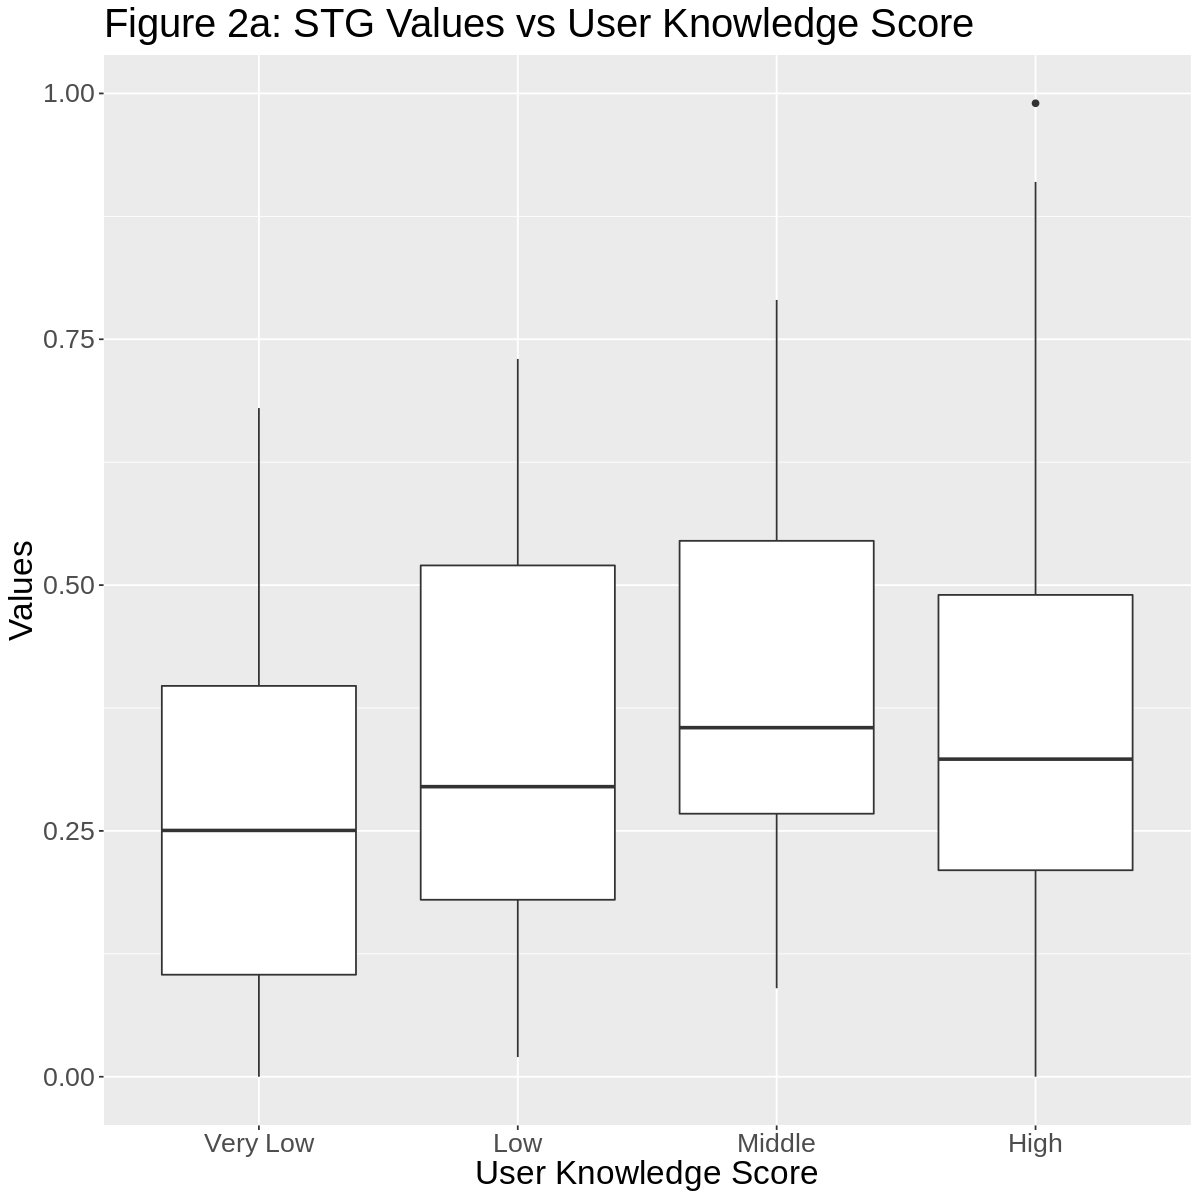

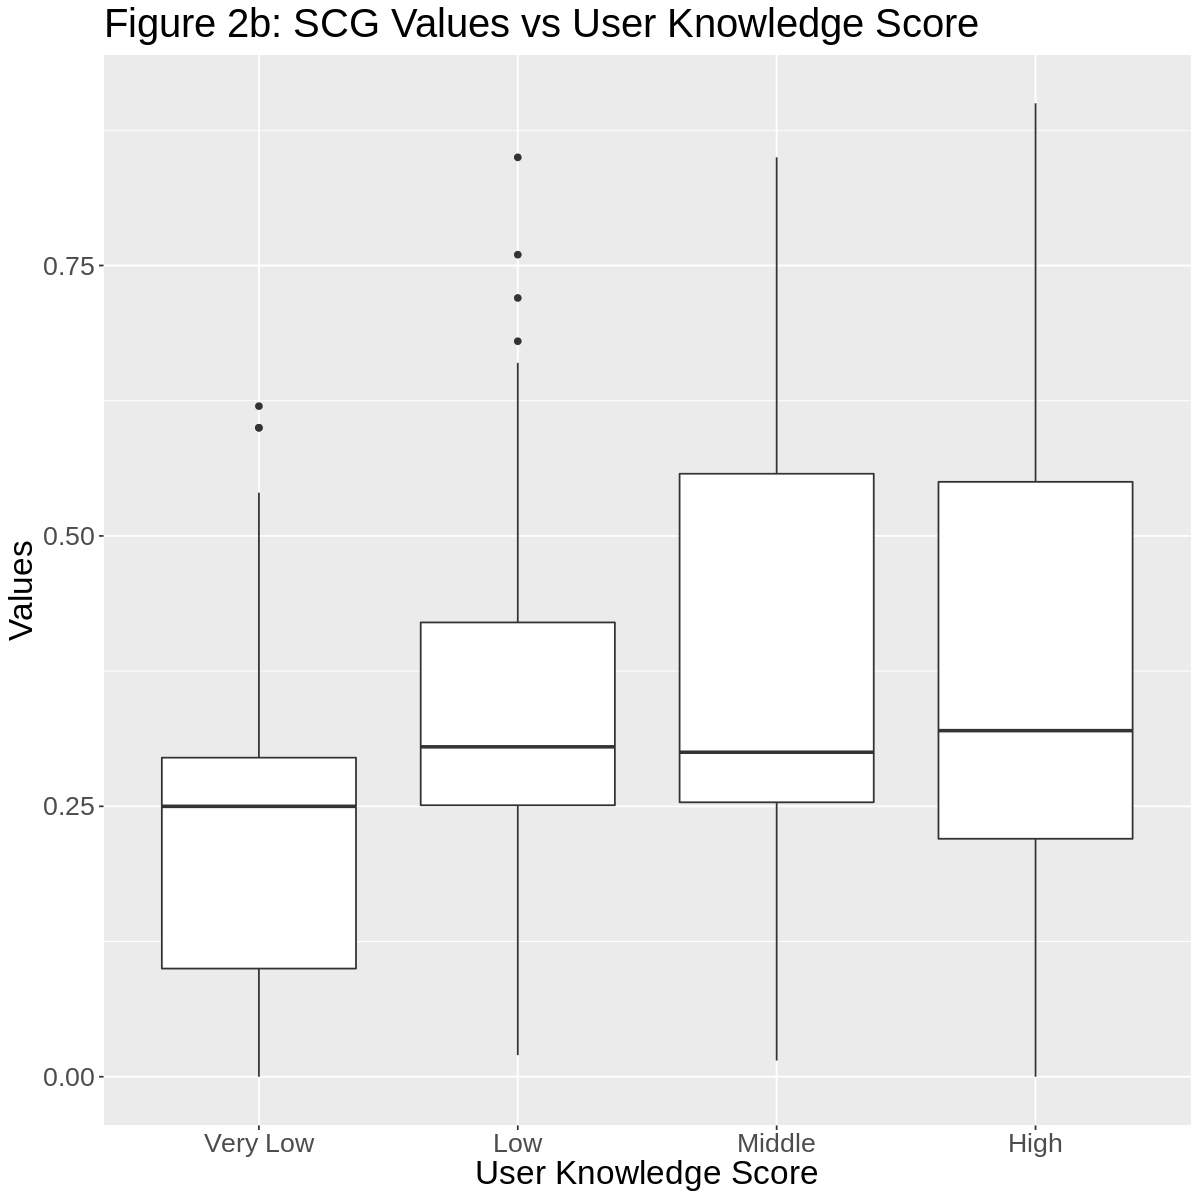

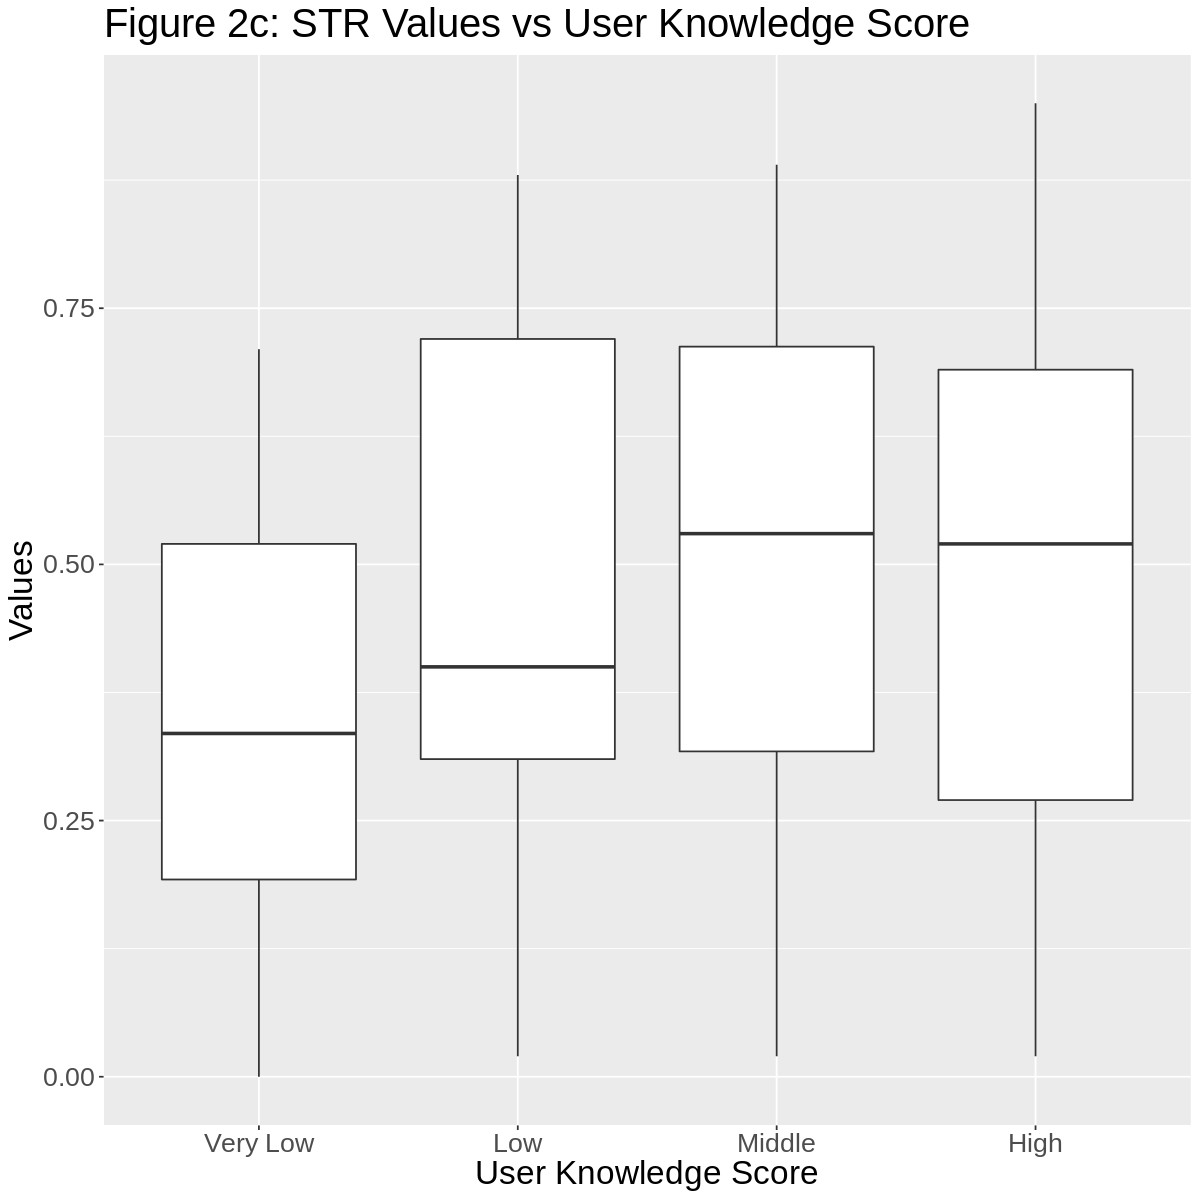

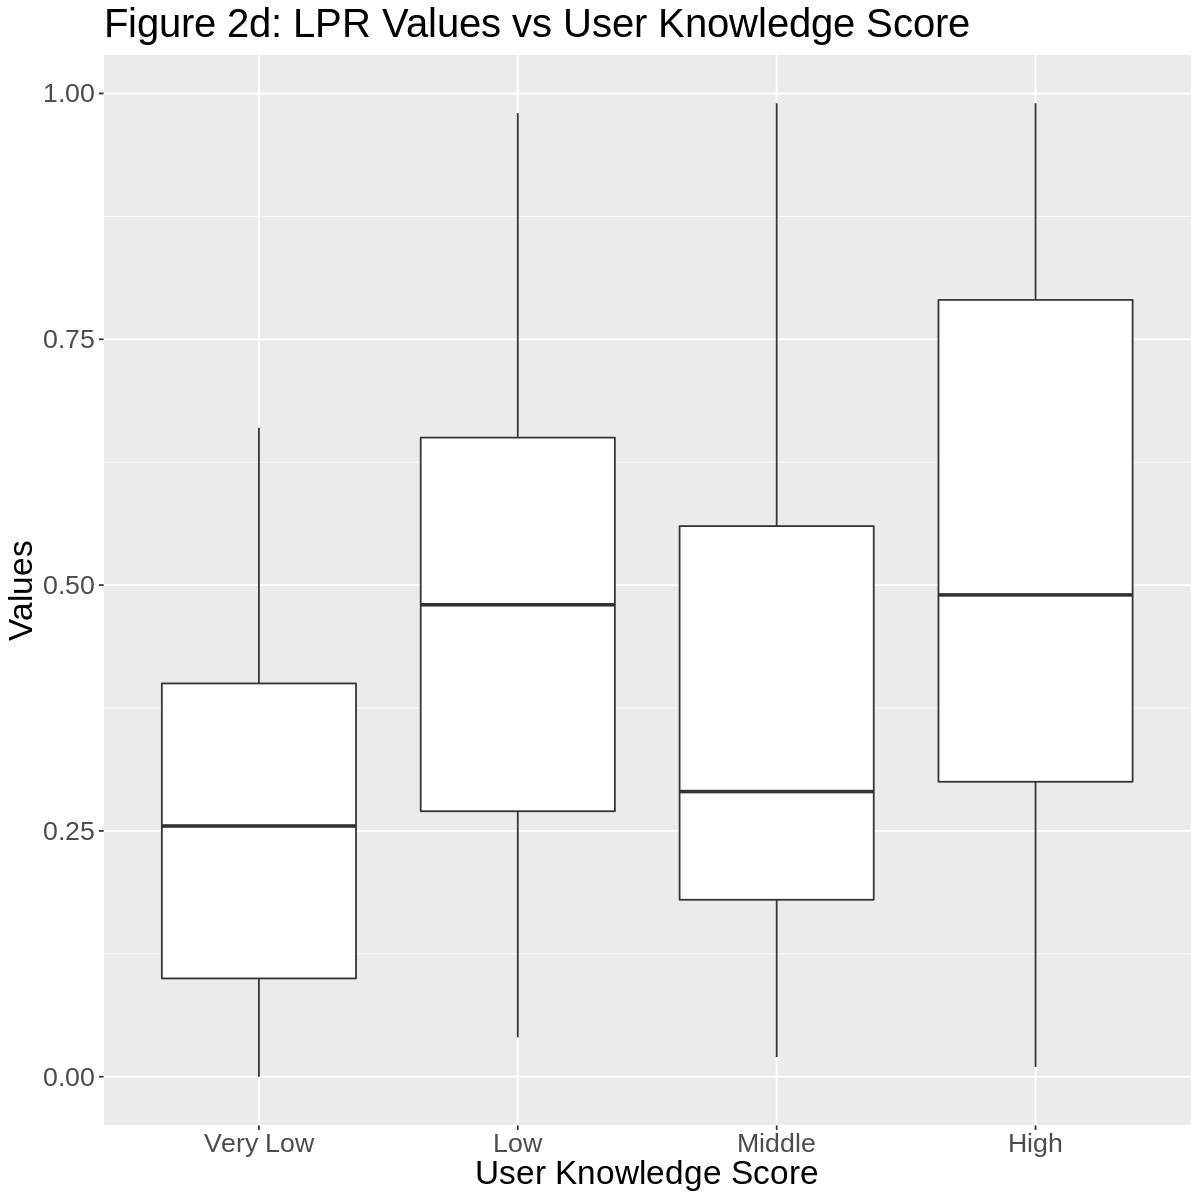

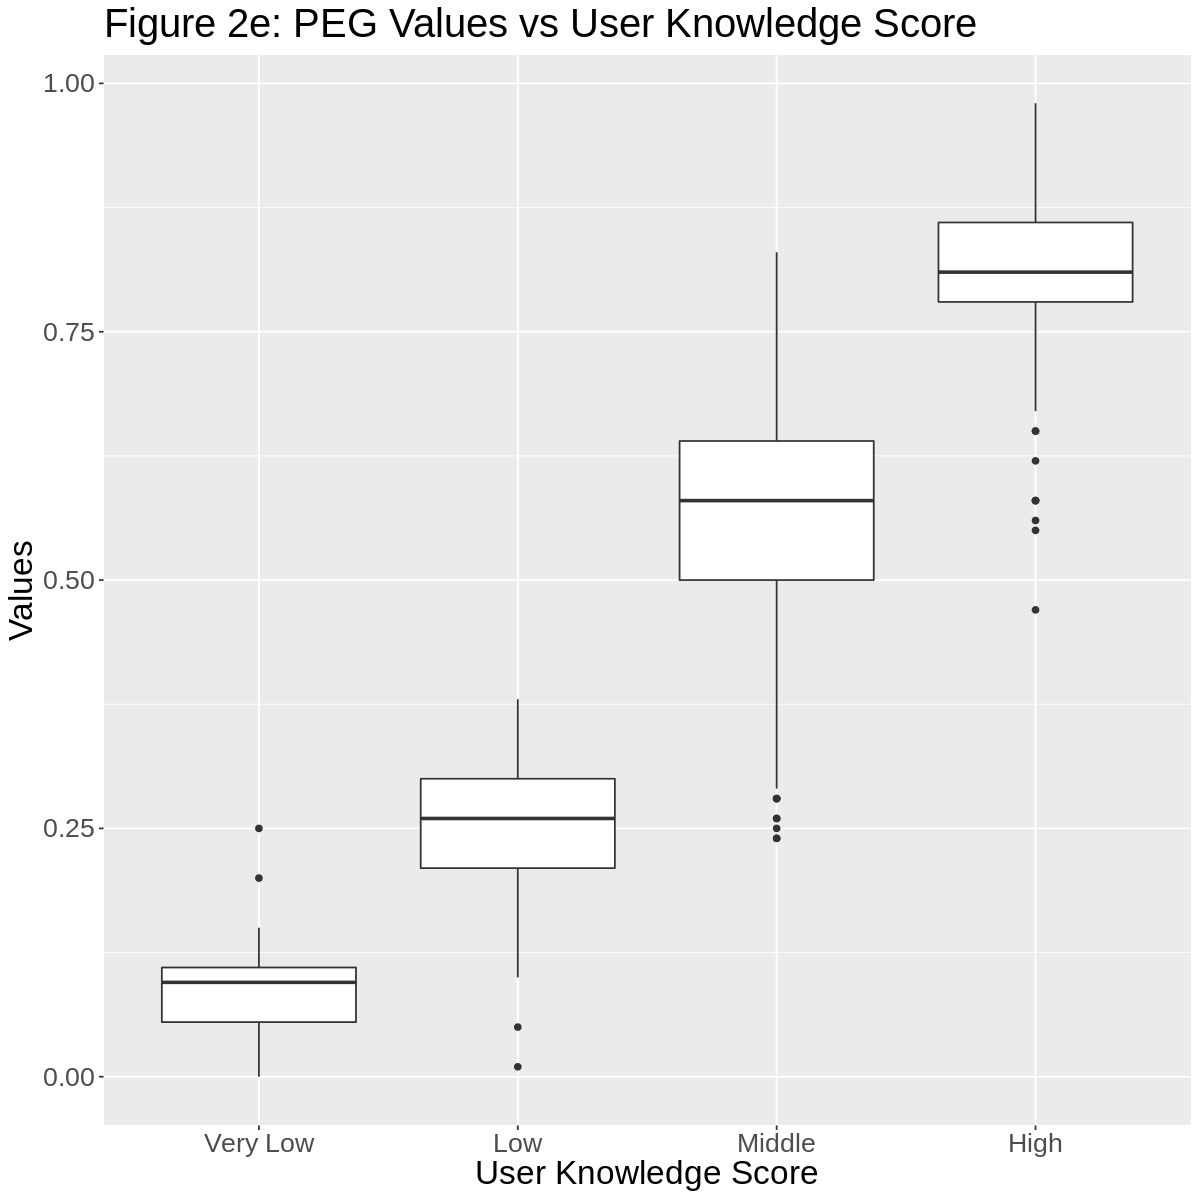

In [10]:
user_knowledge_data_STG <- knowledge_data_training %>%
select(STG, UNS)


user_knowledge_data_SCG <- knowledge_data_training %>%
select(SCG, UNS)


user_knowledge_data_STR <- knowledge_data_training %>%
select(STR, UNS)


user_knowledge_data_LPR <- knowledge_data_training %>%
select(LPR, UNS)


user_knowledge_data_PEG <- knowledge_data_training %>%
select(PEG, UNS)

options(repr.plot.height = 10, repr.plot.width = 10)

user_knowledge_data_STG$UNS <- factor(user_knowledge_data_STG$UNS, levels = c("Very Low", "Low", "Middle", "High"))
STG_box_plot <- ggplot(user_knowledge_data_STG, aes(x = UNS, y = STG)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Values", title= "Figure 2a: STG Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
STG_box_plot

user_knowledge_data_SCG$UNS <- factor(user_knowledge_data_SCG$UNS, levels = c("Very Low", "Low", "Middle", "High"))
SCG_box_plot <- ggplot(user_knowledge_data_SCG, aes(x = UNS, y = SCG)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Values", title= "Figure 2b: SCG Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
SCG_box_plot

user_knowledge_data_STR$UNS <- factor(user_knowledge_data_STR$UNS, levels = c("Very Low", "Low", "Middle", "High"))
STR_box_plot <- ggplot(user_knowledge_data_STR, aes(x = UNS, y = STR)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Values", title= "Figure 2c: STR Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
STR_box_plot

user_knowledge_data_LPR$UNS <- factor(user_knowledge_data_LPR$UNS, levels = c("Very Low", "Low", "Middle", "High"))
LPR_box_plot <- ggplot(user_knowledge_data_LPR, aes(x = UNS, y = LPR)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Values", title= "Figure 2d: LPR Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
LPR_box_plot

user_knowledge_data_PEG$UNS <- factor(user_knowledge_data_PEG$UNS, levels = c("Very Low", "Low", "Middle", "High"))
PEG_box_plot <- ggplot(user_knowledge_data_PEG, aes(x = UNS, y = PEG)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Values", title= "Figure 2e: PEG Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
PEG_box_plot


From our boxplots, we can see the following trends in each of the predictors:
- STG: The medians for all 4 user knowledge categories are very similar, the distributions have significant overlap. This makes it difficult to distinguish between categories and thus would make not be a good predictor in our model. 
- SCG: Although the medians are very similar, the distributions have more variance and appear to have less overlap. There also seems to be monotonic increase from "Very Low" to "High" user knowledge scores, thus at this stage we may consider using this predictor in our model.  
- STR: Although the medians appear to have some variance, the distributions have significant overlap across all four UNS categories, thus rendering it unsuitable for use in classification.
- LPR: The median appears to "zig-zag" as it increases across the UNS categories, this is also reflected in the distributions. Thus we are able to distinguish certain categories such as "Very Low" to "Low" and "Medium" to "High". Thus rendering this as a good predictor for our model. 
- PEG: There is obvious and significant differentiation between the four categories, both in terms of the median and overall distribution. This makes for a very good predictor in our model. 

In [ ]:
#check with Cathy if we need box plot or not 

Picking joint bandwidth of 0.0764

Picking joint bandwidth of 0.068



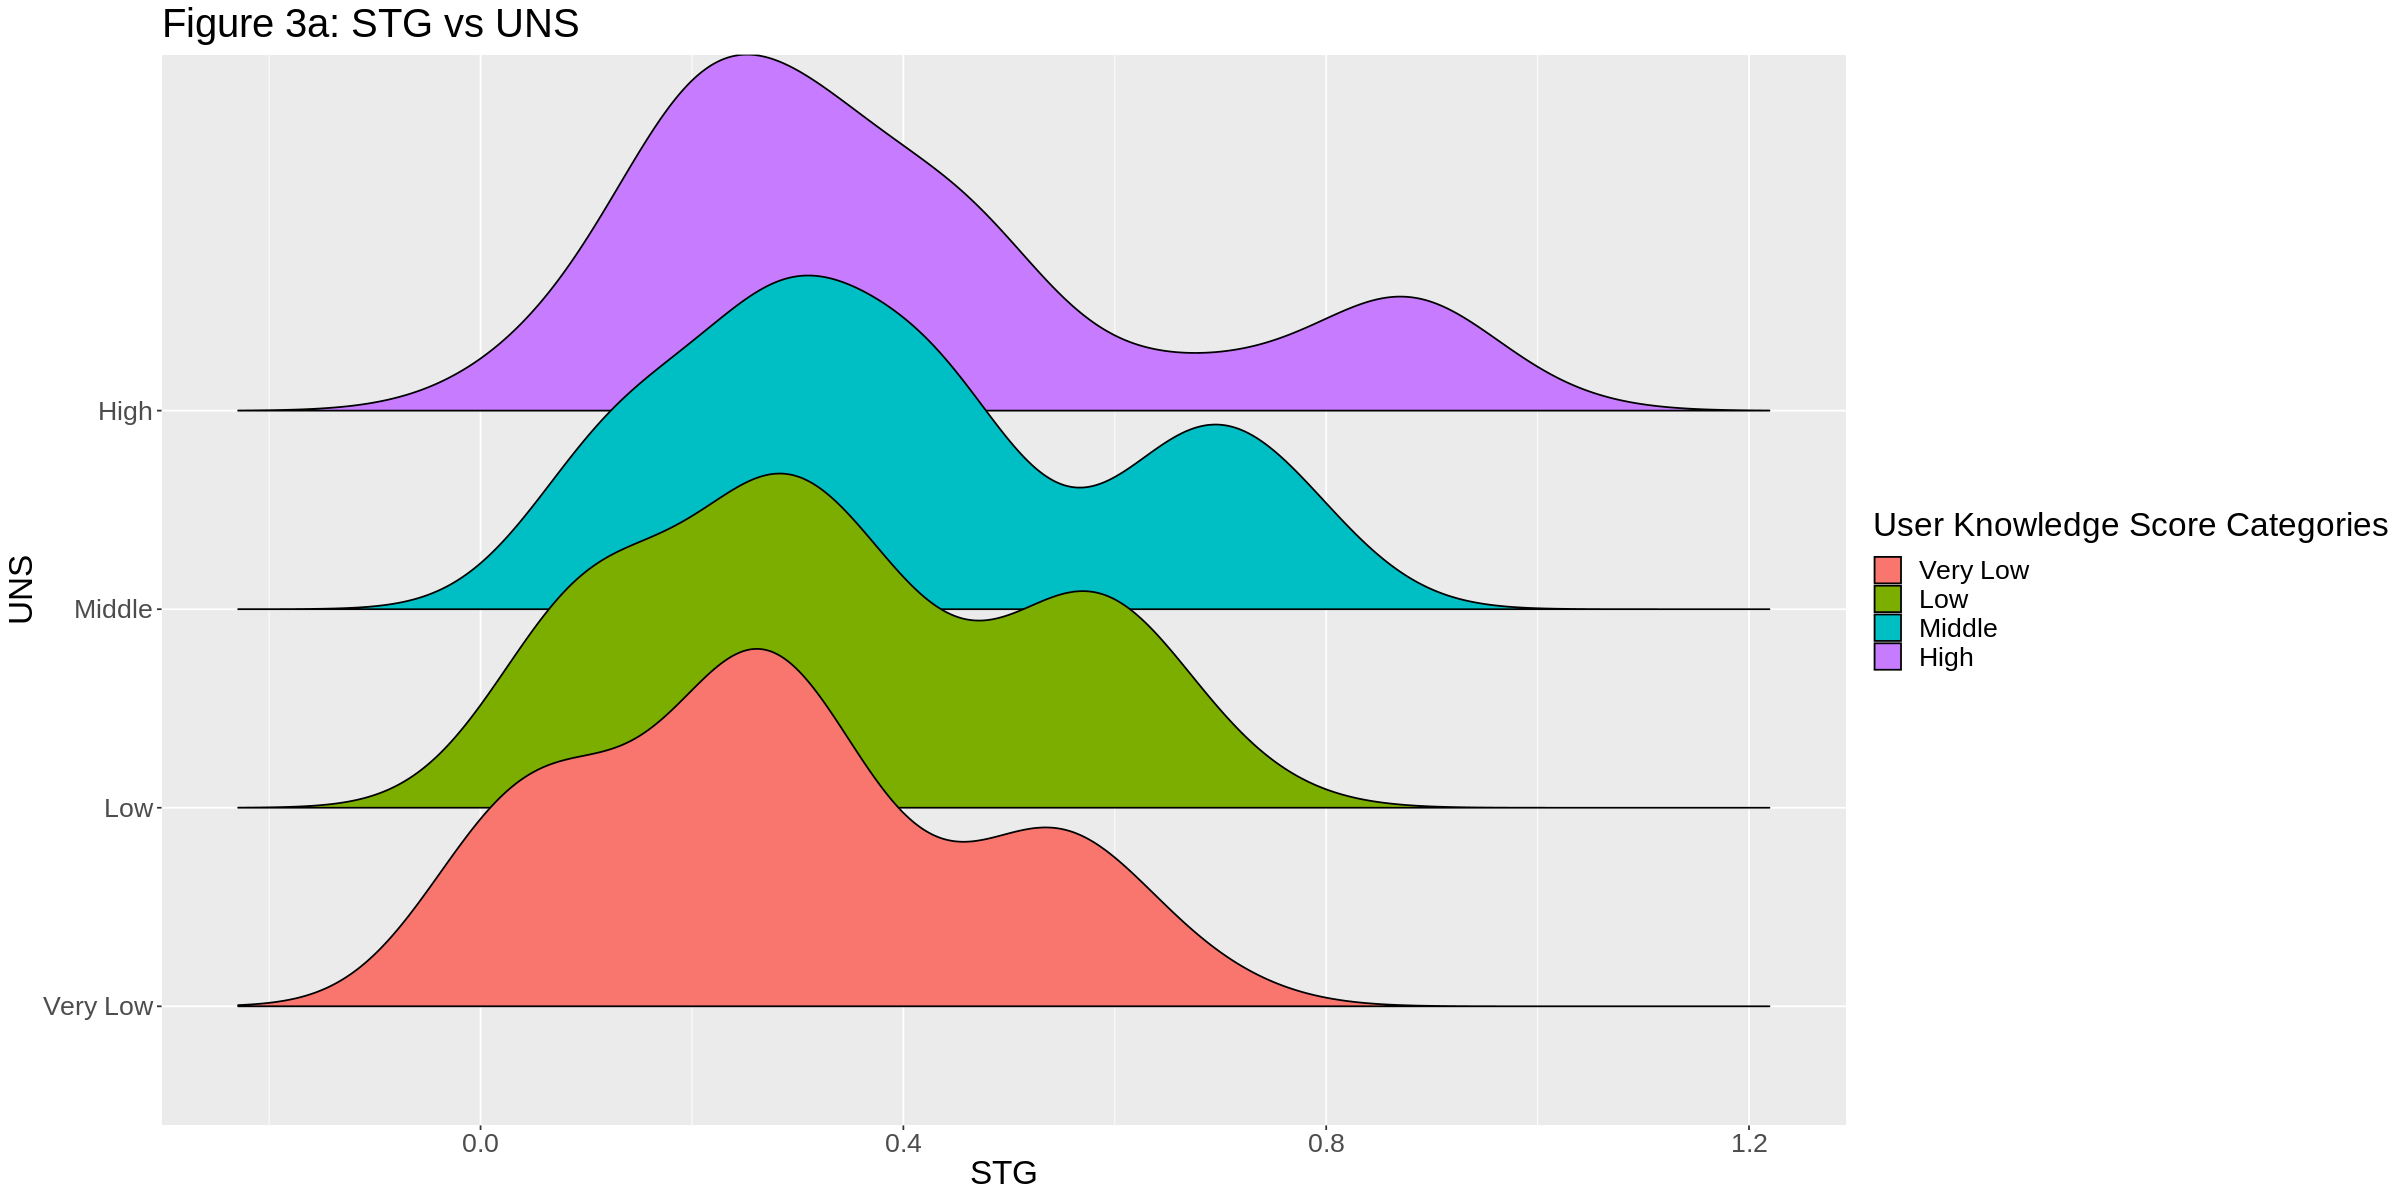

Picking joint bandwidth of 0.0922



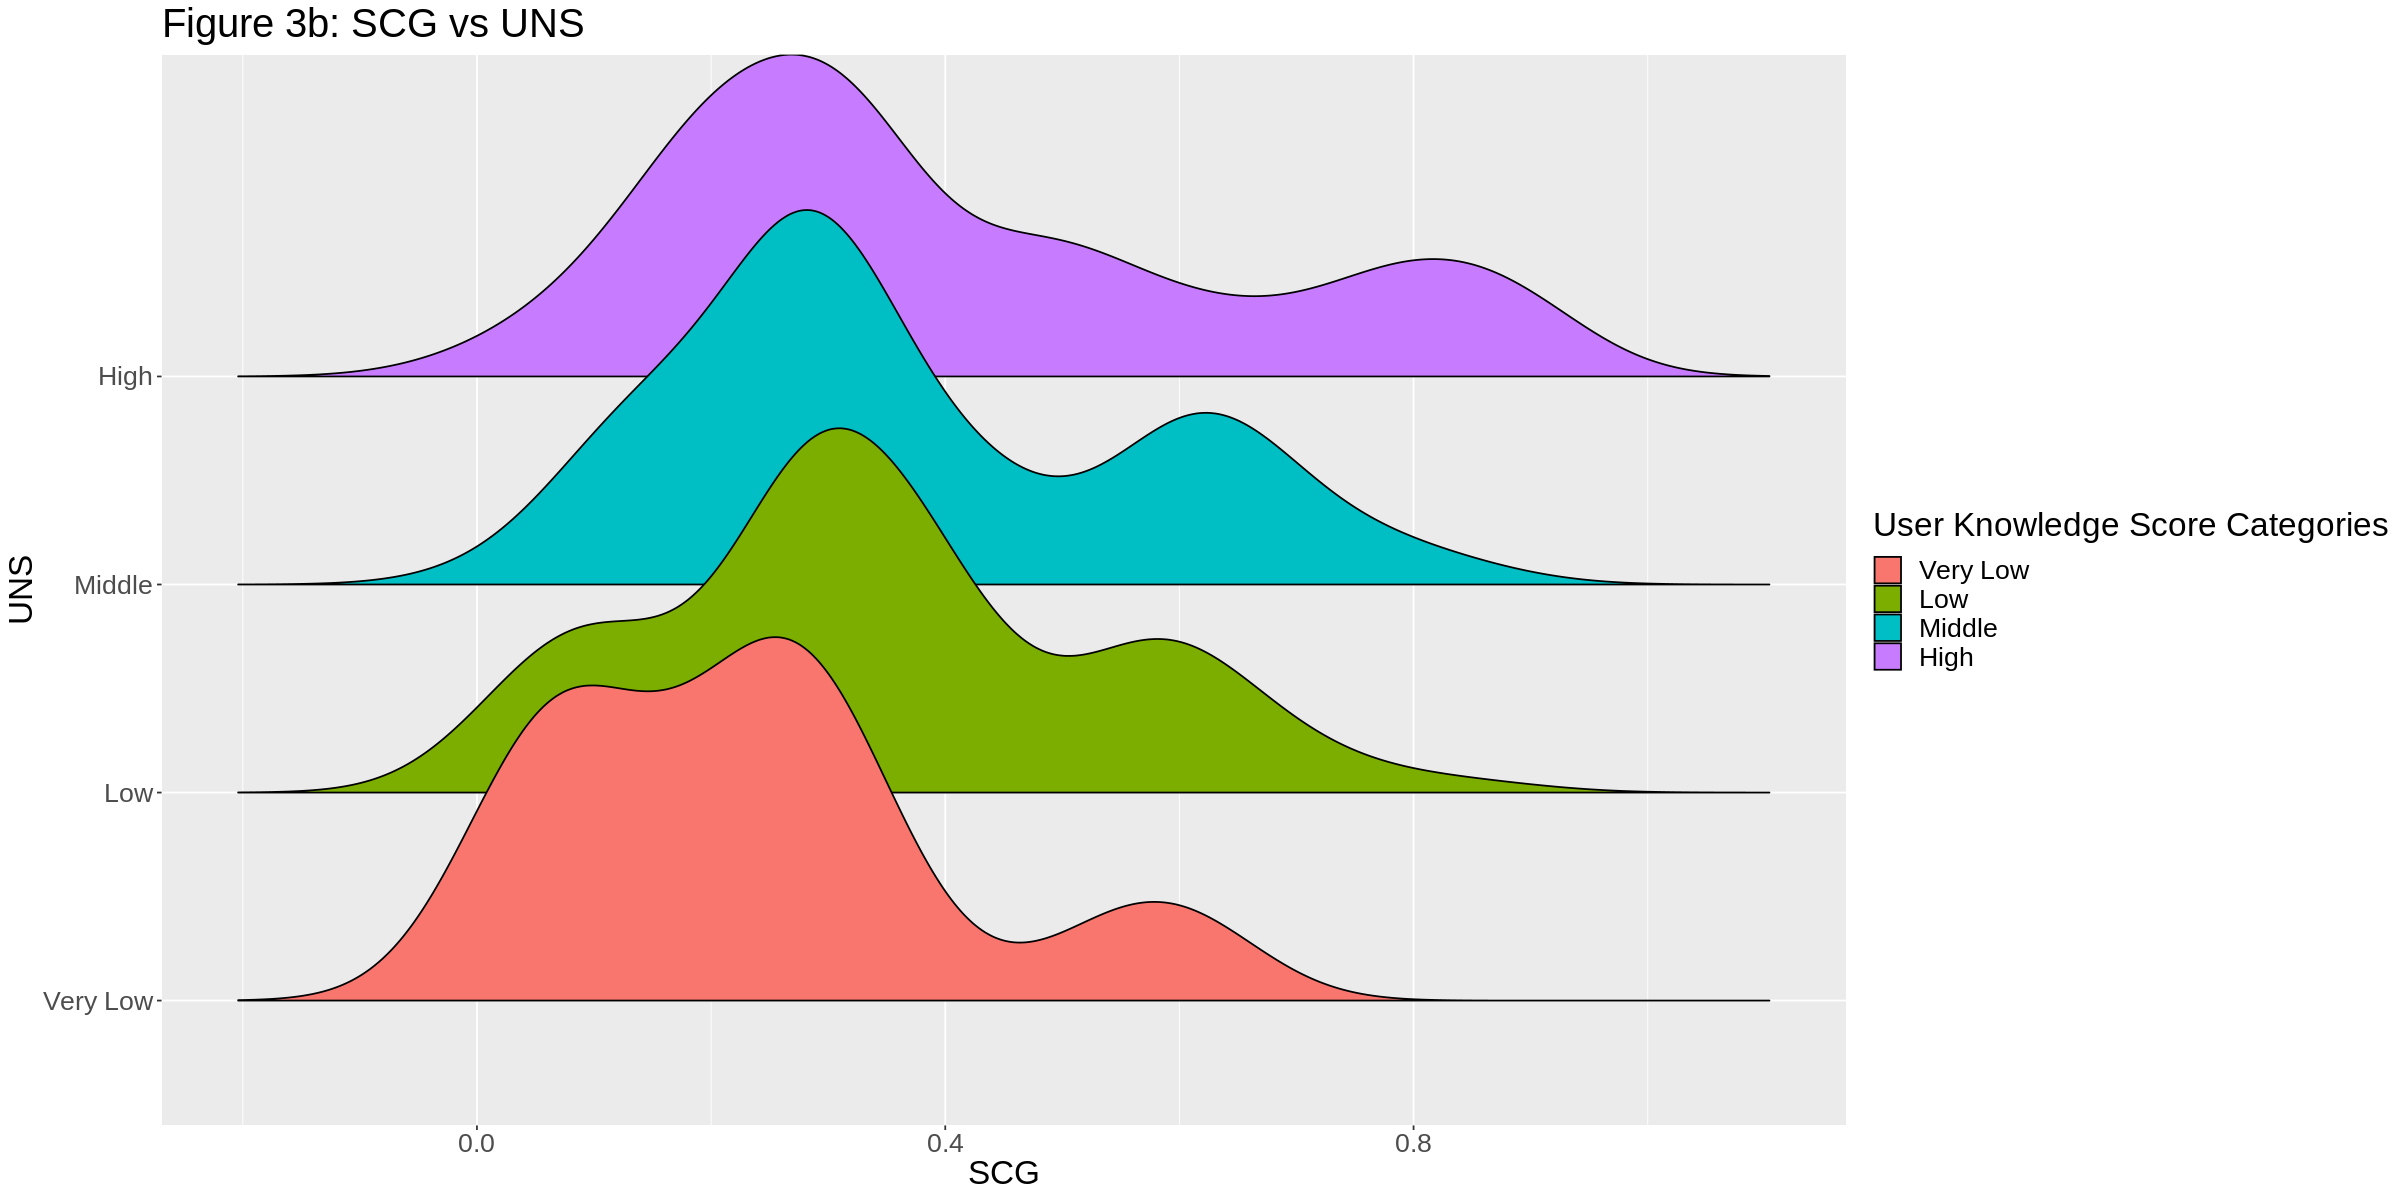

Picking joint bandwidth of 0.0911



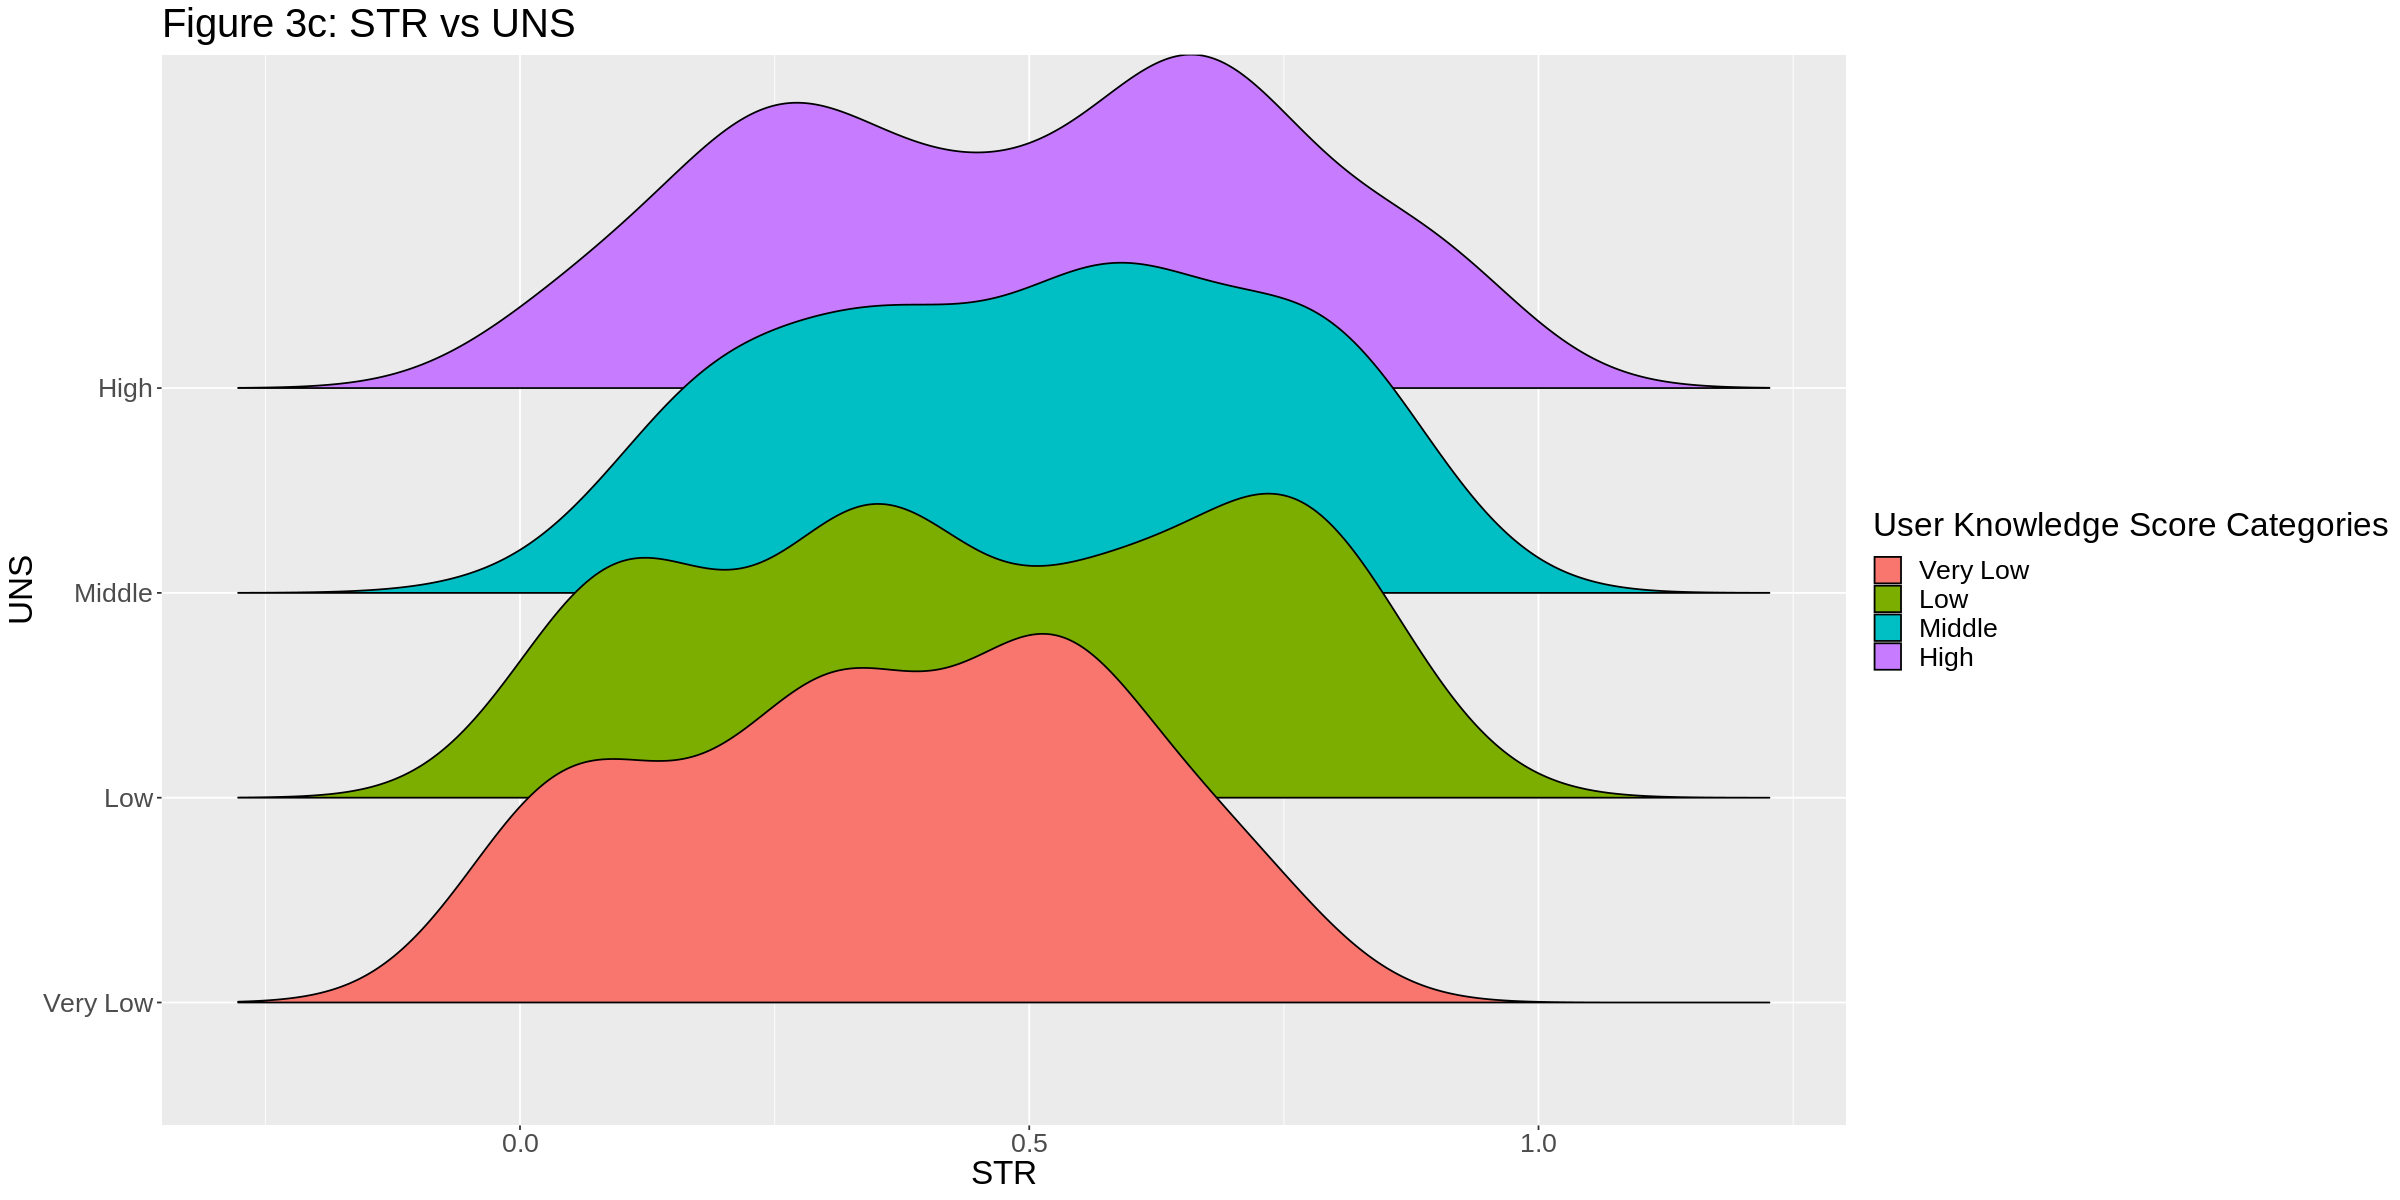

Picking joint bandwidth of 0.0257



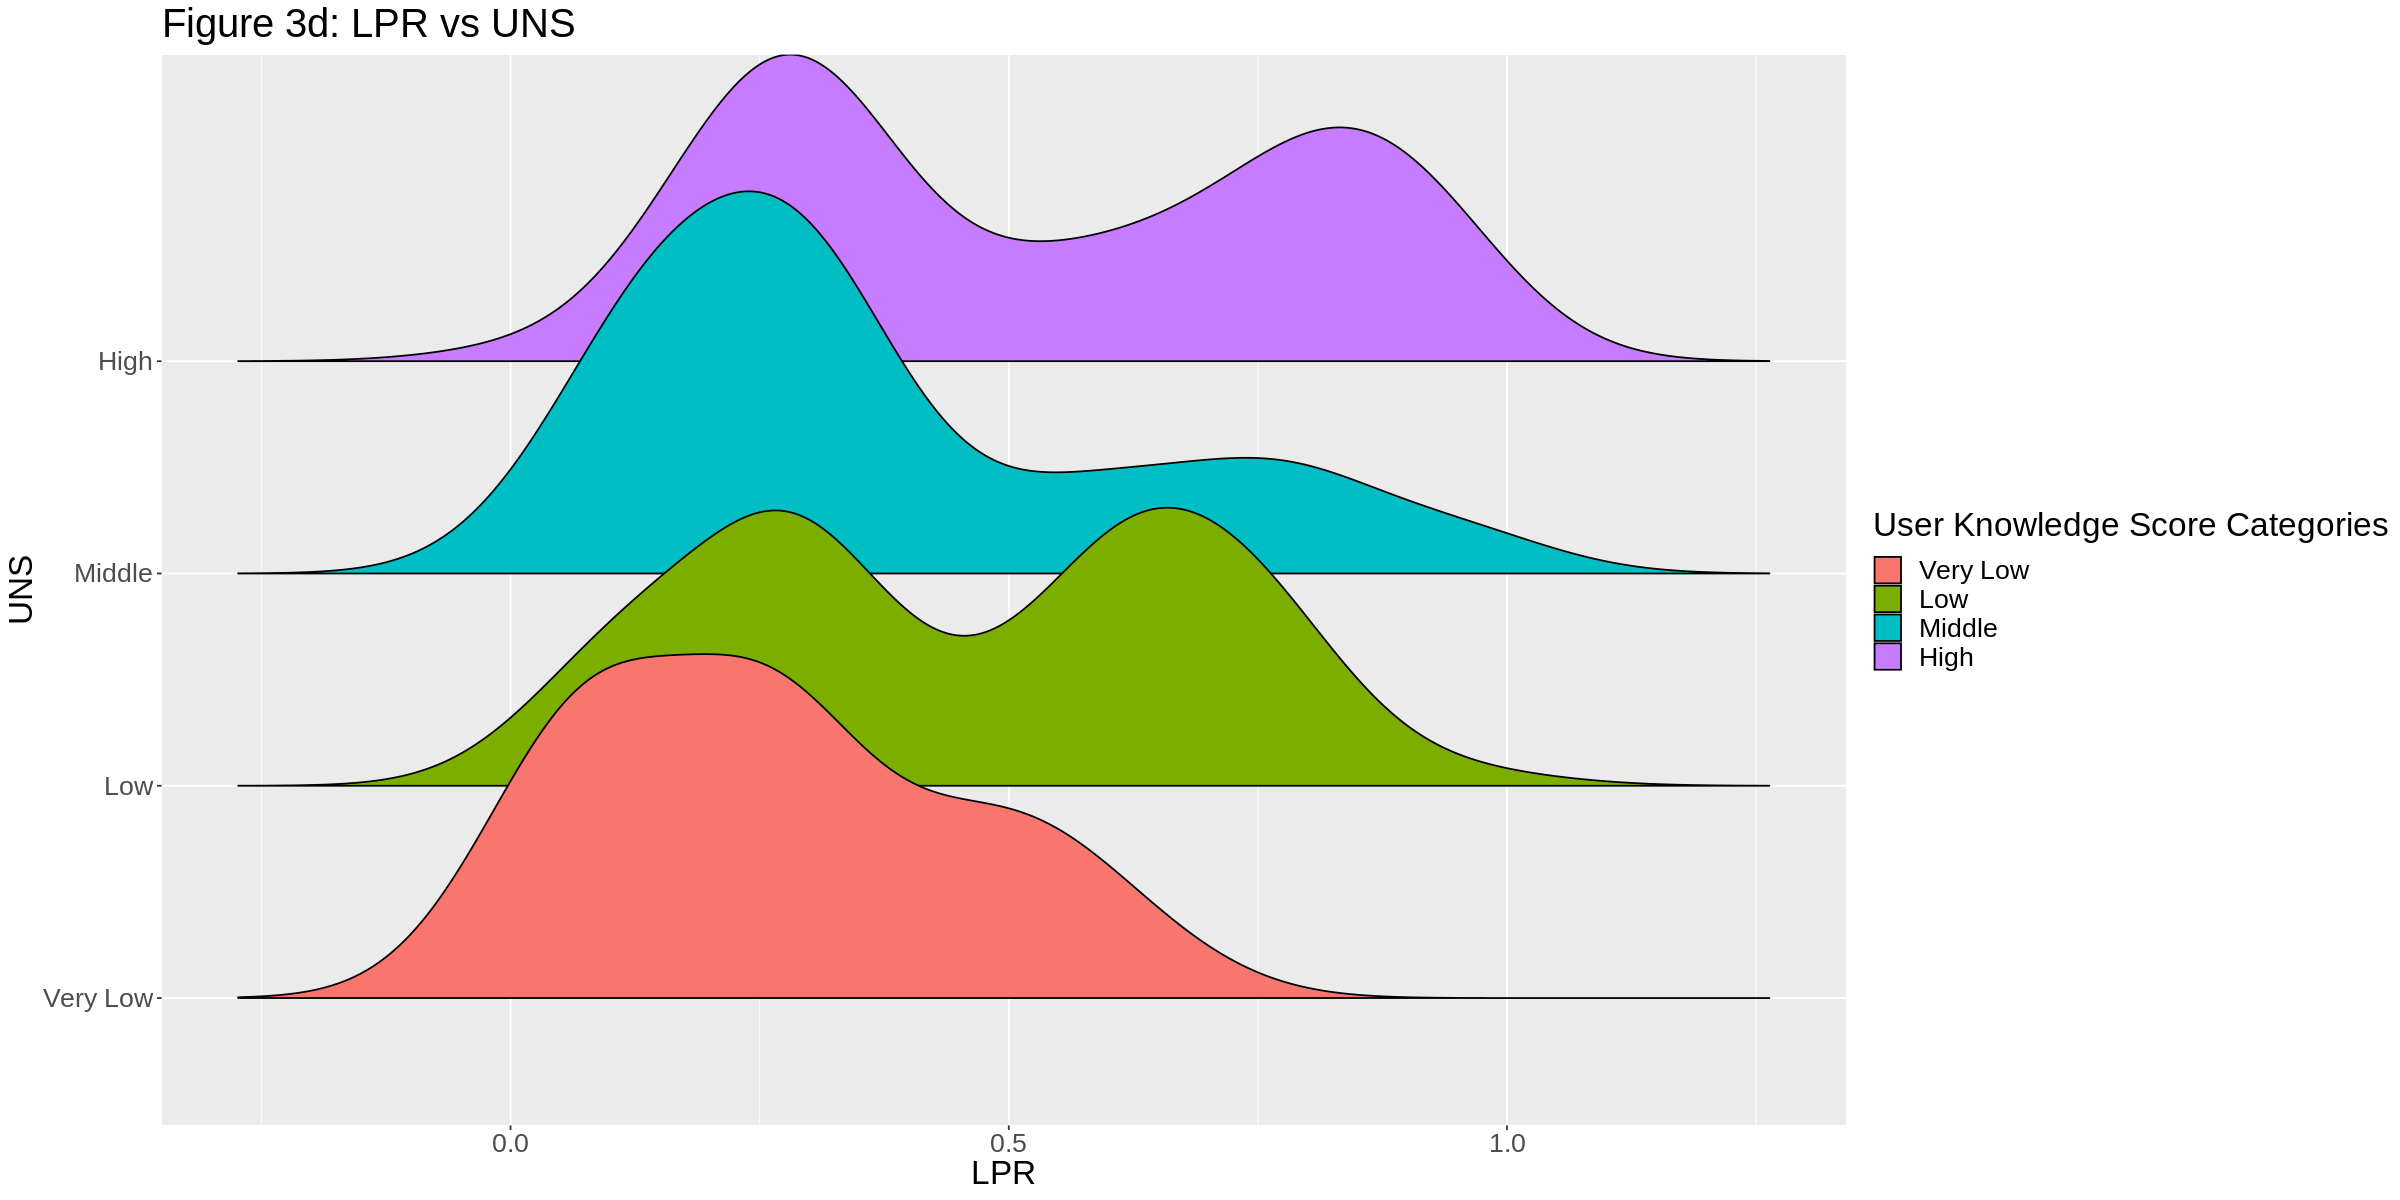

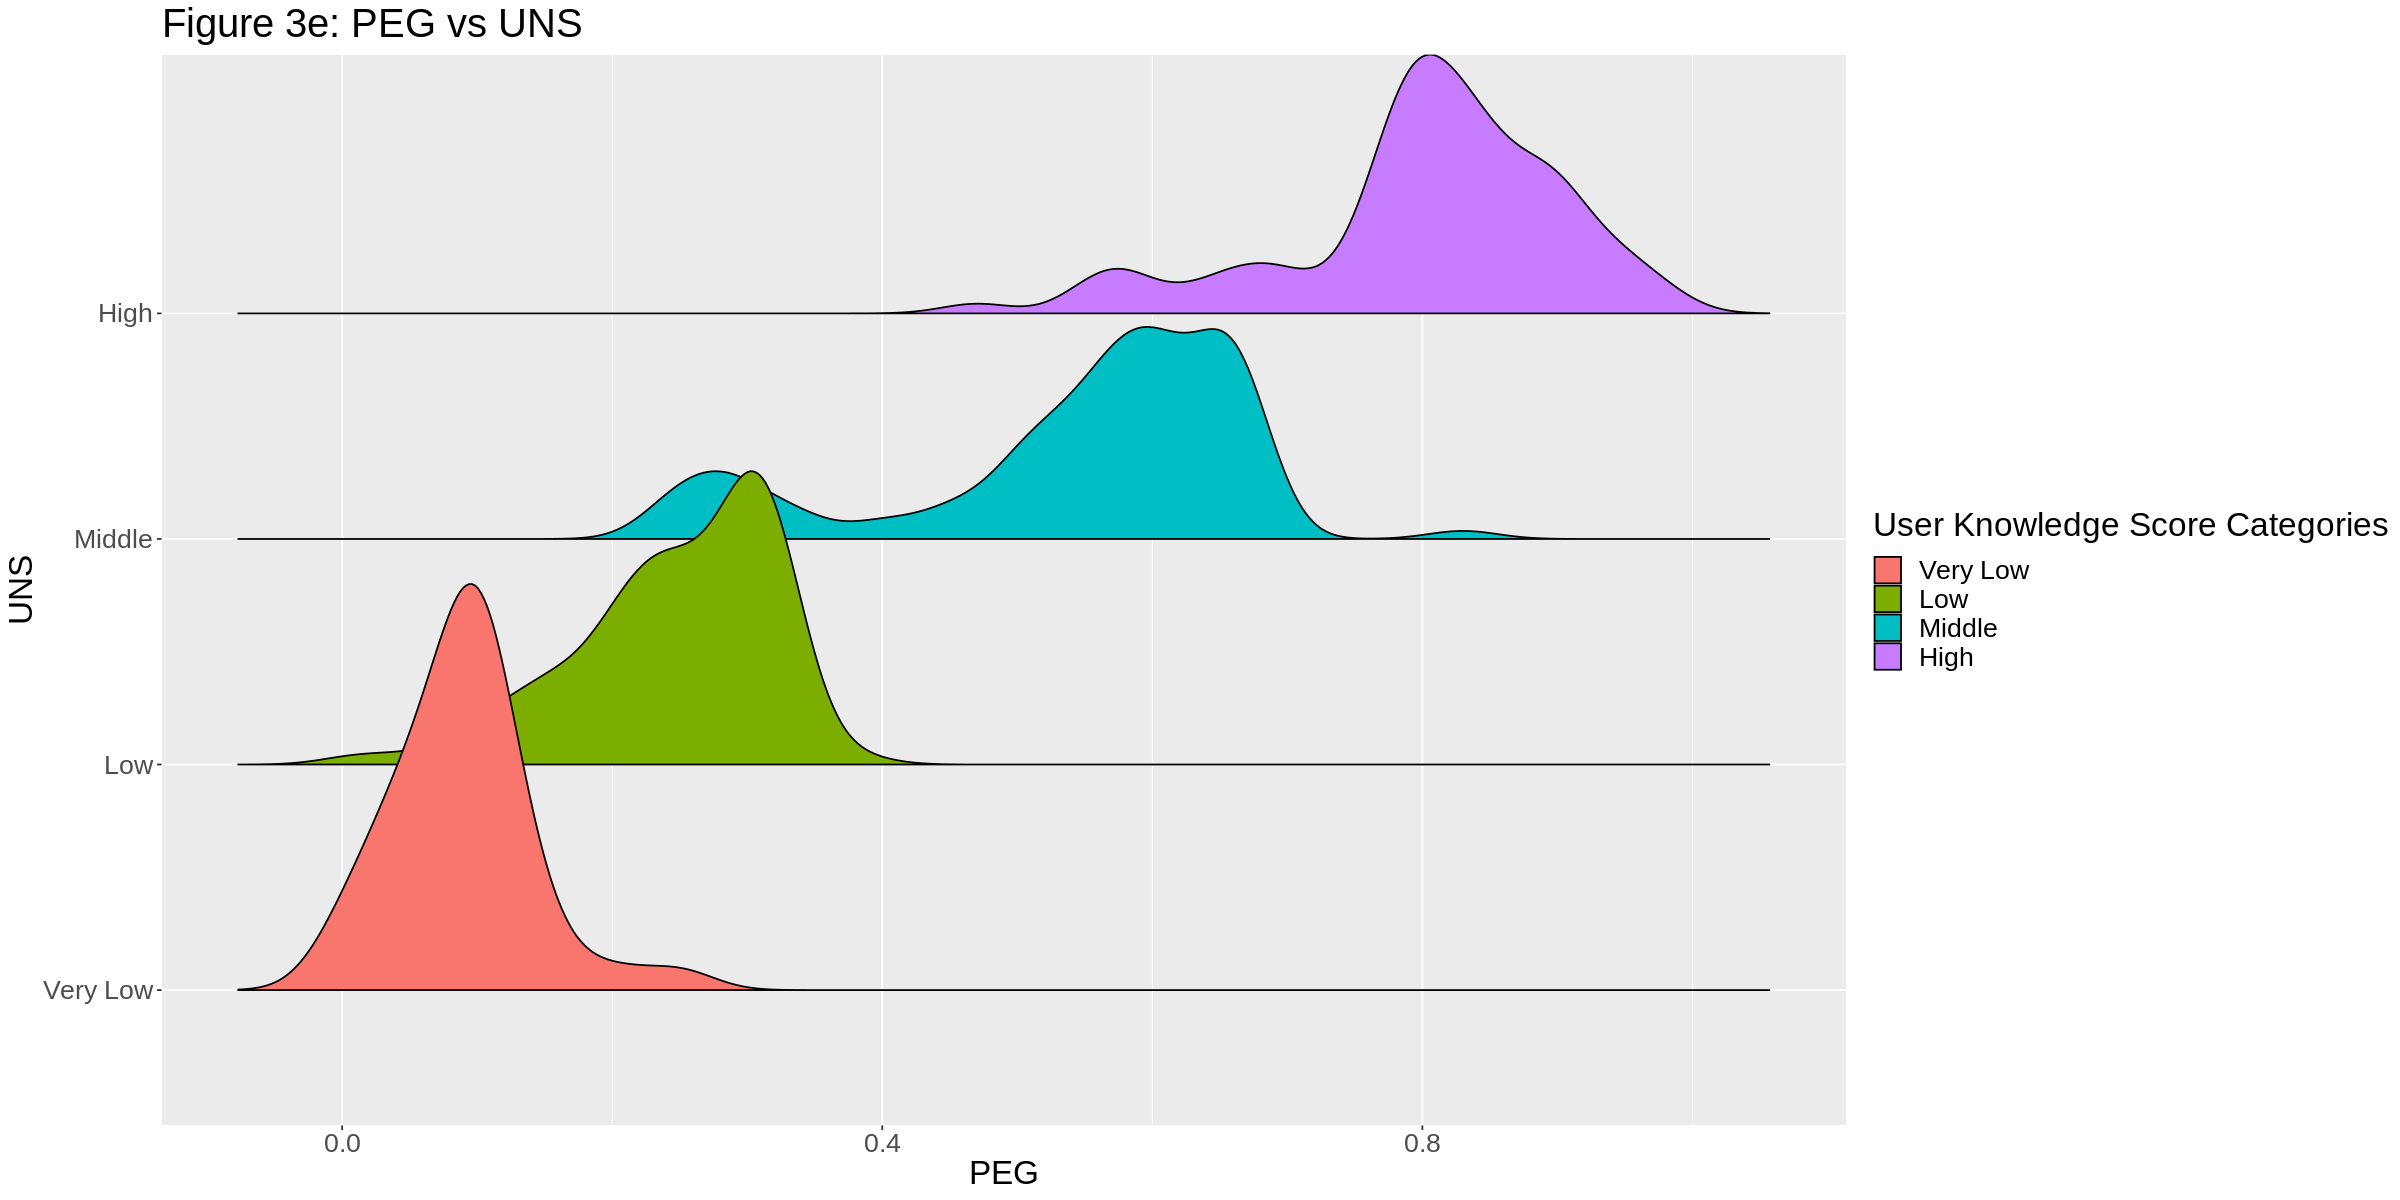

In [11]:
options(repr.plot.height = 10, repr.plot.width = 20)

ggplot(user_knowledge_data_STG, aes(x = STG, y = UNS, fill = UNS)) + 
    geom_density_ridges2() +
    labs(title = "Figure 3a: STG vs UNS", fill = "User Knowledge Score Categories") +
    theme(text = element_text(size = 20))

ggplot(user_knowledge_data_SCG, aes(x = SCG, y = UNS, fill = UNS)) + 
    geom_density_ridges2() +
    labs(title = "Figure 3b: SCG vs UNS", fill = "User Knowledge Score Categories") +
    theme(text = element_text(size = 20))

ggplot(user_knowledge_data_STR, aes(x = STR, y = UNS, fill = UNS)) + 
    geom_density_ridges2() +
    labs(title = "Figure 3c: STR vs UNS", fill = "User Knowledge Score Categories") +
    theme(text = element_text(size = 20))

ggplot(user_knowledge_data_LPR, aes(x = LPR, y = UNS, fill = UNS)) + 
    geom_density_ridges2() +
    labs(title = "Figure 3d: LPR vs UNS", fill = "User Knowledge Score Categories") +
    theme(text = element_text(size = 20))

ggplot(user_knowledge_data_PEG, aes(x = PEG, y = UNS, fill = UNS)) +
    geom_density_ridges2() +
    labs(title = "Figure 3e: PEG vs UNS", fill = "User Knowledge Score Categories") +
    theme(text = element_text(size = 20))



From our ridgeplots, we can see the following trends in each of the predictors:
- STG: We can see a rough bimodal distribution for all four UNS categories that overlap significantly, thus our initial assessment based on the boxplots of this not being a good predictor is confirmed. 
- SCG: Contrary to our assessment from the boxplots, we can see in the ggridge that this variable no longer appears to be a good predictor as it very closely resembles a similar distribution as our STG variable, thus we will not include it in our model.  
- STR: Confirmming our initial assessment, all four knowledge score distirbutions can be seen to have significant overlap in a unimodal fashion. Thus, we can exclude this predictor completely from our model.
- LPR: There appears to be irregularity in the distributions such that we are able to distinguish between certain categories such as "Very Low" to "Low" and "Medium" to "High" based on the varying probability densities under certain values. Thus confirming our initial assessment and can include this variable in our predictive model. 
- PEG: From the ggridge, we can see slight overlap in the distributions; however, there is still significant deliniation between the four categories. This confirming our intial assessment with the boxplots and making for a very good predictor in our model. 

From the plots, we are able to select 2 predictors, PEG and LPR. However, PEG has a significant difference in the distribution for each knowledge category and we would like to confirm that it is not single handedly responsible for any observed classification accuracy. Thus, we will formulate and run 2 classification models: one utilizing only PEG, the other utilizing both PEG and LPR to evaluate the respective contributions of each predictor to the observed accuracies. 

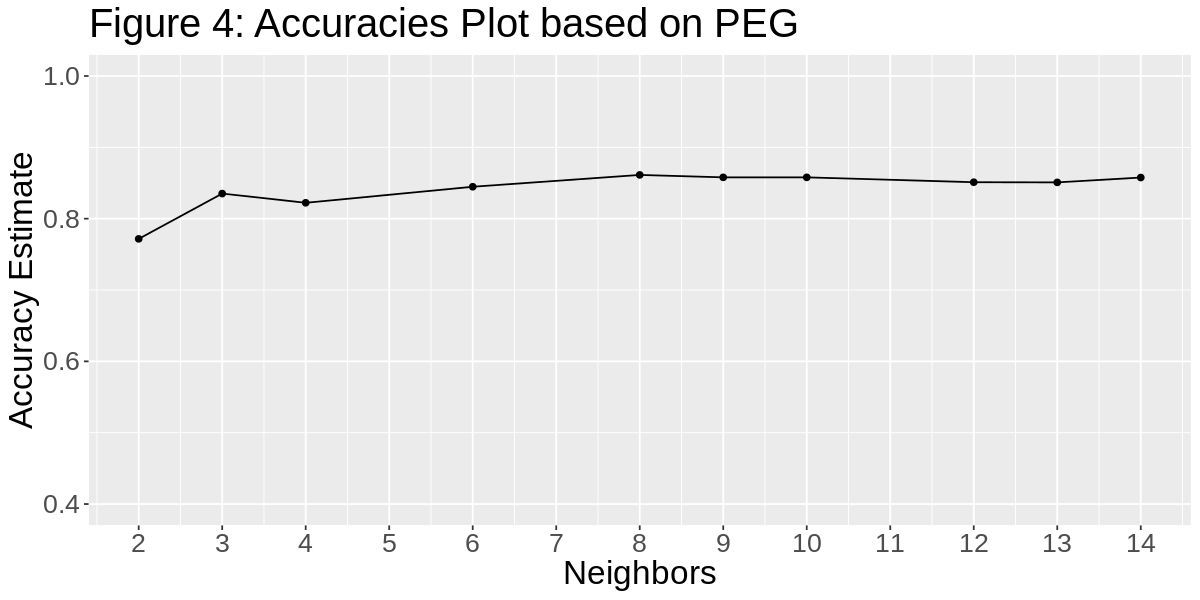

In [12]:
set.seed(2000)

peg_knowledge_recipe <- recipe(UNS ~ PEG, data = knowledge_data_training)

peg_knowledge_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")

peg_knowledge_vfold <- vfold_cv(knowledge_data_training, v = 5, strata = UNS)

peg_knowledge_results <- workflow() %>%
       add_recipe(peg_knowledge_recipe) %>%
       add_model(peg_knowledge_tune) %>%
       tune_grid(resamples = peg_knowledge_vfold, grid = 10) %>%
       collect_metrics()

options(repr.plot.height = 5, repr.plot.width = 10)

peg_accuracies <- peg_knowledge_results %>% 
       filter(.metric == "accuracy")

peg_accuracies_plot <- ggplot(peg_accuracies, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", title = "Figure 4: Accuracies Plot based on PEG ") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  
       scale_y_continuous(limits = c(0.4, 1.0)) + 
       theme(text = element_text(size = 20)) 

peg_accuracies_plot

From this accuracy plot, only using one variable (PEG), we can see that the optimized k (neighbor) = 3 at roughly 85% accuracy. Although it appears that k=4 gives the high accuracy estimate, we did not choose k=4 to avoid an even split between the neighboring labels. 

In [ ]:
#try make k values from 1-100 and multiple of 10 for the k values (10, 20, 30, 40, .., 100)

In [22]:
set.seed(2000)

peg_knowledge_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
       set_engine("kknn") %>%
       set_mode("classification")

peg_knowledge_fit <- workflow() %>%
       add_recipe(peg_knowledge_recipe) %>%
       add_model(peg_knowledge_spec) %>%
       fit(data = knowledge_data_testing)
peg_knowledge_fit
                                   
peg_knowledge_predictions <- predict(peg_knowledge_fit, knowledge_data_testing) %>%
       bind_cols(knowledge_data_testing)
head(peg_knowledge_predictions)

peg_knowledge_metrics <- peg_knowledge_predictions %>%
       metrics(truth = UNS, estimate = .pred_class)
peg_knowledge_metrics

peg_knowledge_conf_mat <- peg_knowledge_predictions %>%
       conf_mat(truth = UNS, estimate = .pred_class)
peg_knowledge_conf_mat
                         

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~3, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2727273
Best kernel: rectangular
Best k: 3

.pred_class,STG,SCG,STR,LPR,PEG,UNS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Low,0.37,0.070,0.10,0.41,0.30,Low
High,0.49,0.340,0.88,0.75,0.71,High
Middle,0.20,0.200,0.70,0.30,0.60,Middle
Middle,0.76,0.258,0.07,0.83,0.34,Middle
High,0.30,0.320,0.43,0.87,0.83,High
High,0.31,0.320,0.29,0.31,0.96,High


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8383838
kap,multiclass,0.7762080


          Truth
Prediction Very Low High Low Middle
  Very Low       10    0   1      0
  High            0   22   0      3
  Low             2    0  30      6
  Middle          0    3   1     21

From fiting our model with using k (neighbors) = 3 and only using PEG as our predictor, our predictions (classifier) garner a 89.9% accuracy.

The confusion matrix indicates relatively few mismatches and any that do occur are not extreme, e.g. misclassifications from Middle to Low occur, but not from Middle to Very Low or from Very High to Low or vice versa.

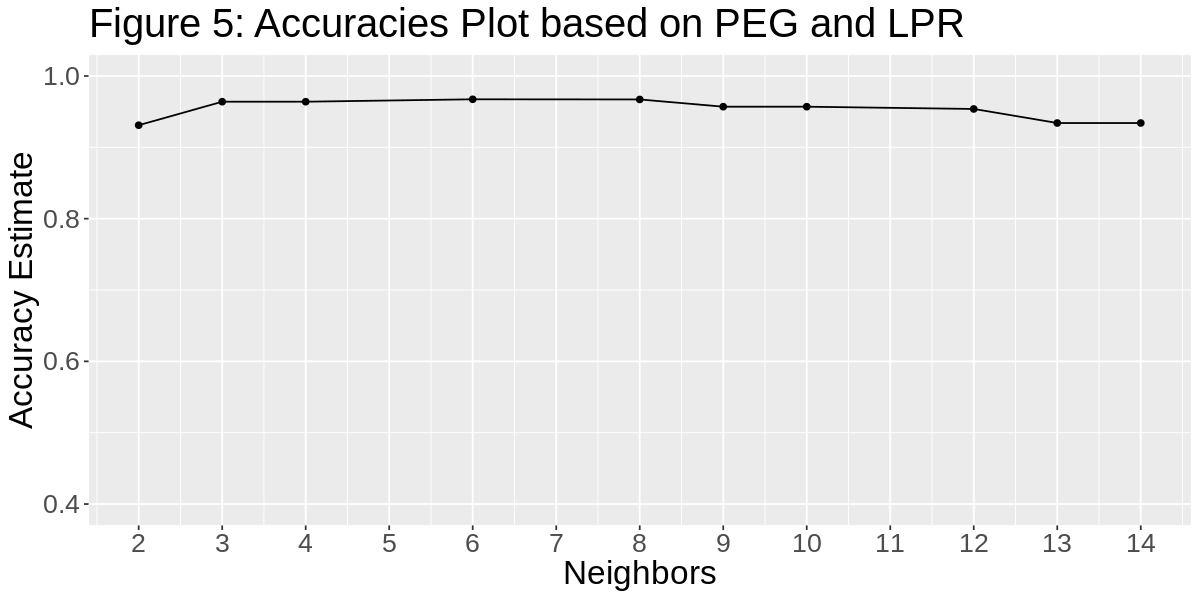

In [14]:
set.seed(2000)

knowledge_recipe <- recipe(UNS ~ PEG + LPR, data = knowledge_data_training)

knowledge_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")

knowledge_vfold <- vfold_cv(knowledge_data_training, v = 5, strata = UNS)

knowledge_results <- workflow() %>%
       add_recipe(knowledge_recipe) %>%
       add_model(knowledge_tune) %>%
       tune_grid(resamples = knowledge_vfold, grid = 10) %>%
       collect_metrics()

options(repr.plot.height = 5, repr.plot.width = 10)

accuracies <- knowledge_results %>% 
       filter(.metric == "accuracy")

accuracies_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", title = "Figure 5: Accuracies Plot based on PEG and LPR") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  
       scale_y_continuous(limits = c(0.4, 1.0)) + 
       theme(text = element_text(size = 20)) 
 

accuracies_plot

From this accuracy plot, using two predictors (PEG and LPR) we can see that the optimized k (neighbors) = 3 at roughly 97% accuracy. We could pick any k value between 3-6, but we decided to choose an odd number to avoid an even split between the neighboring labels and a smaller number to avoid overfitting. 

In [ ]:
#try change the k values

In [15]:
set.seed(2000)

knowledge_recipe <- recipe(UNS ~ PEG + LPR, data = knowledge_data_training)

knowledge_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
       set_engine("kknn") %>%
       set_mode("classification")

knowledge_fit <- workflow() %>%
       add_recipe(knowledge_recipe) %>%
       add_model(knowledge_spec) %>%
       fit(data = knowledge_data_testing)
knowledge_fit
                                   
knowledge_predictions <- predict(knowledge_fit, knowledge_data_testing) %>%
       bind_cols(knowledge_data_testing)
head(knowledge_predictions)

knowledge_metrics <- knowledge_predictions %>%
       metrics(truth = UNS, estimate = .pred_class)
knowledge_metrics

knowledge_conf_mat <- knowledge_predictions %>%
       conf_mat(truth = UNS, estimate = .pred_class)
knowledge_conf_mat
                                   
                                   

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~3, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.08080808
Best kernel: rectangular
Best k: 3

.pred_class,STG,SCG,STR,LPR,PEG,UNS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Low,0.37,0.070,0.10,0.41,0.30,Low
High,0.49,0.340,0.88,0.75,0.71,High
Middle,0.20,0.200,0.70,0.30,0.60,Middle
Middle,0.76,0.258,0.07,0.83,0.34,Middle
High,0.30,0.320,0.43,0.87,0.83,High
High,0.31,0.320,0.29,0.31,0.96,High


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9393939
kap,multiclass,0.9159593


          Truth
Prediction Very Low High Low Middle
  Very Low       10    0   0      0
  High            0   24   0      1
  Low             2    0  31      1
  Middle          0    1   1     28

As in the previous model, the confusion matrix indicates relatively few mismatches and any that do occur are not extreme, e.g. misclassifications from Middle to Low occur, but not from Middle to Very Low or from Very High to Low or vice versa. The number of misclassifications is also reduced across the board.

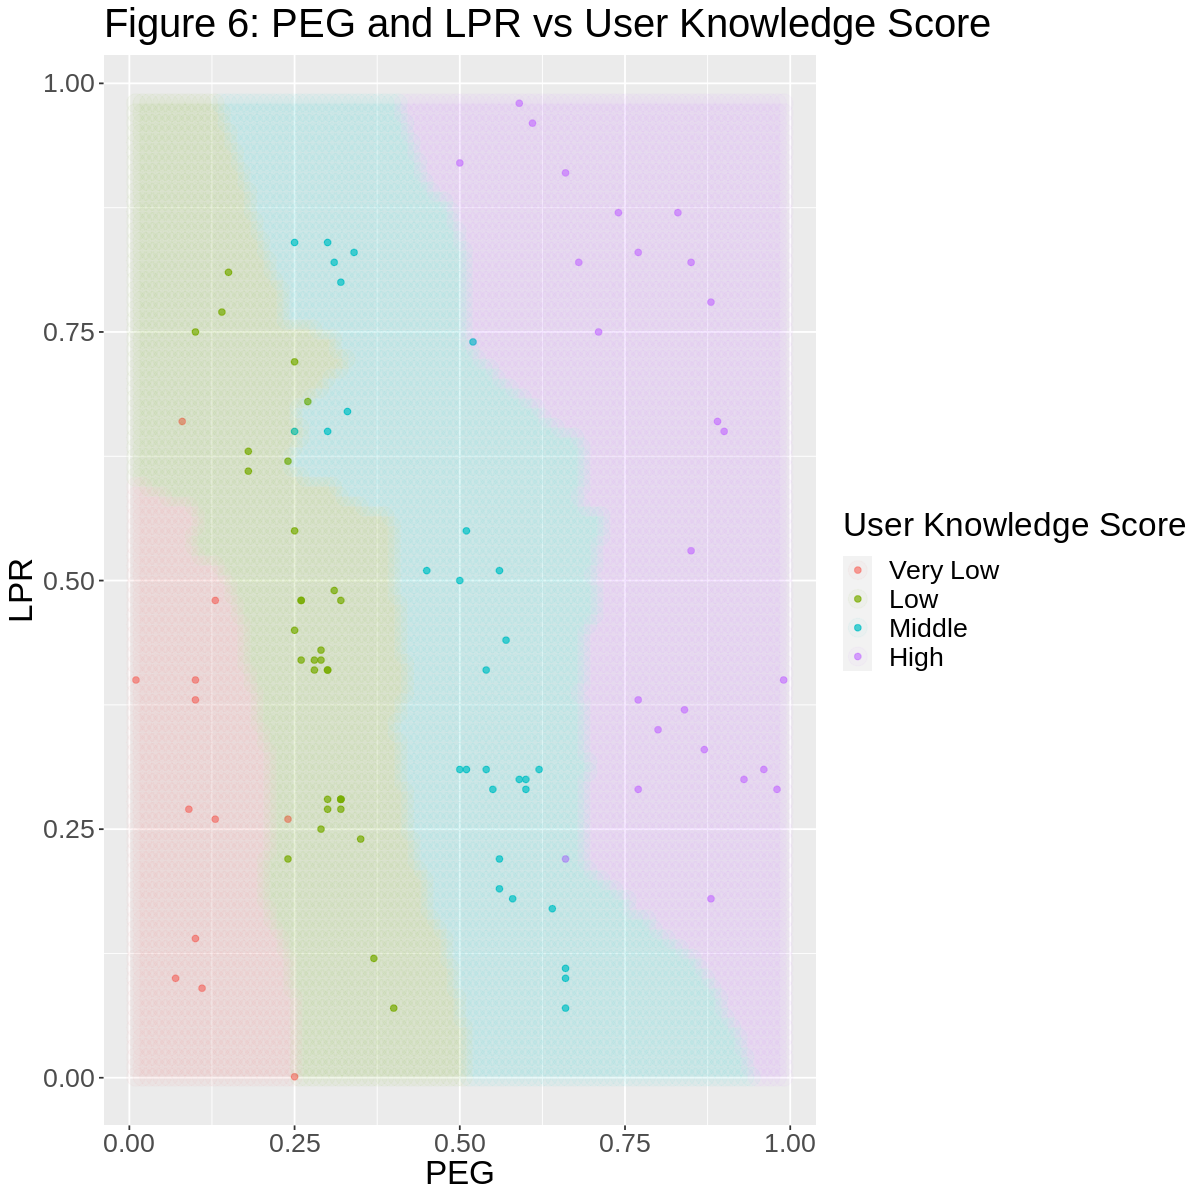

In [16]:
options(repr.plot.height = 10, repr.plot.width = 10)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
    set_engine("kknn") %>%
    set_mode("classification")
  
knn_fit <- workflow() %>%
    add_recipe(knowledge_recipe) %>%
    add_model(knn_spec) %>%
    fit(data = knowledge_data_testing)

peg_grid <- seq(min(knowledge_data_testing$PEG), max(knowledge_data_testing$PEG), length.out = 100)
lpr_grid <- seq(min(knowledge_data_testing$LPR), max(knowledge_data_testing$LPR), length.out = 100)
scgrid <- as_tibble(expand.grid(PEG = peg_grid, LPR = lpr_grid))
knnPredGrid <- predict(knn_fit, scgrid)
prediction_table <- bind_cols(knnPredGrid, scgrid) %>% rename(UNS = .pred_class)

knowledge_predictions$UNS <- factor(knowledge_predictions$UNS, levels = c("Very Low", "Low", "Middle", "High"))

knowledge_prediction_plot <- ggplot() +
    geom_point(data = knowledge_predictions, mapping = aes(x = PEG, y = LPR, color = UNS), alpha= 0.7) +
    geom_point(data = prediction_table, mapping = aes(x = PEG, y = LPR, color = UNS), alpha = 0.03, size = 5.) +
    labs(color = "User Knowledge Score") +
    ggtitle("Figure 6: PEG and LPR vs User Knowledge Score") + 
    theme(text = element_text(size = 20))


 
knowledge_prediction_plot


The above plot identifies the solution spaces for the classification by utilizing LPR and PEG as predictors. 

From fiting our model with k (neighbors) = 3 and using PEG and LPR instead of just PEG as our predictor, our classifier increased from a 85% to a 97% accuracy

When using only PEG as our predictor, we saw a k value of 5 to be optimal from the accuracy plot and obtained a prediction accuracy of 85%. This agrees with our initial assessment of PEG being an excellent predictor due to the clear deliniation between UNS categories. 

When adding LPR as a predictor in addition to PEG, we saw many similar k values ranging from 3 to 14, but came to the conclusion that 3 offered the highest accuracy. From this we obtained a prediction accuracy of 97%, an increase of 12% from our original model which only used PEG. Thus, LPR was able to better allow our model to differentiate between categories. 

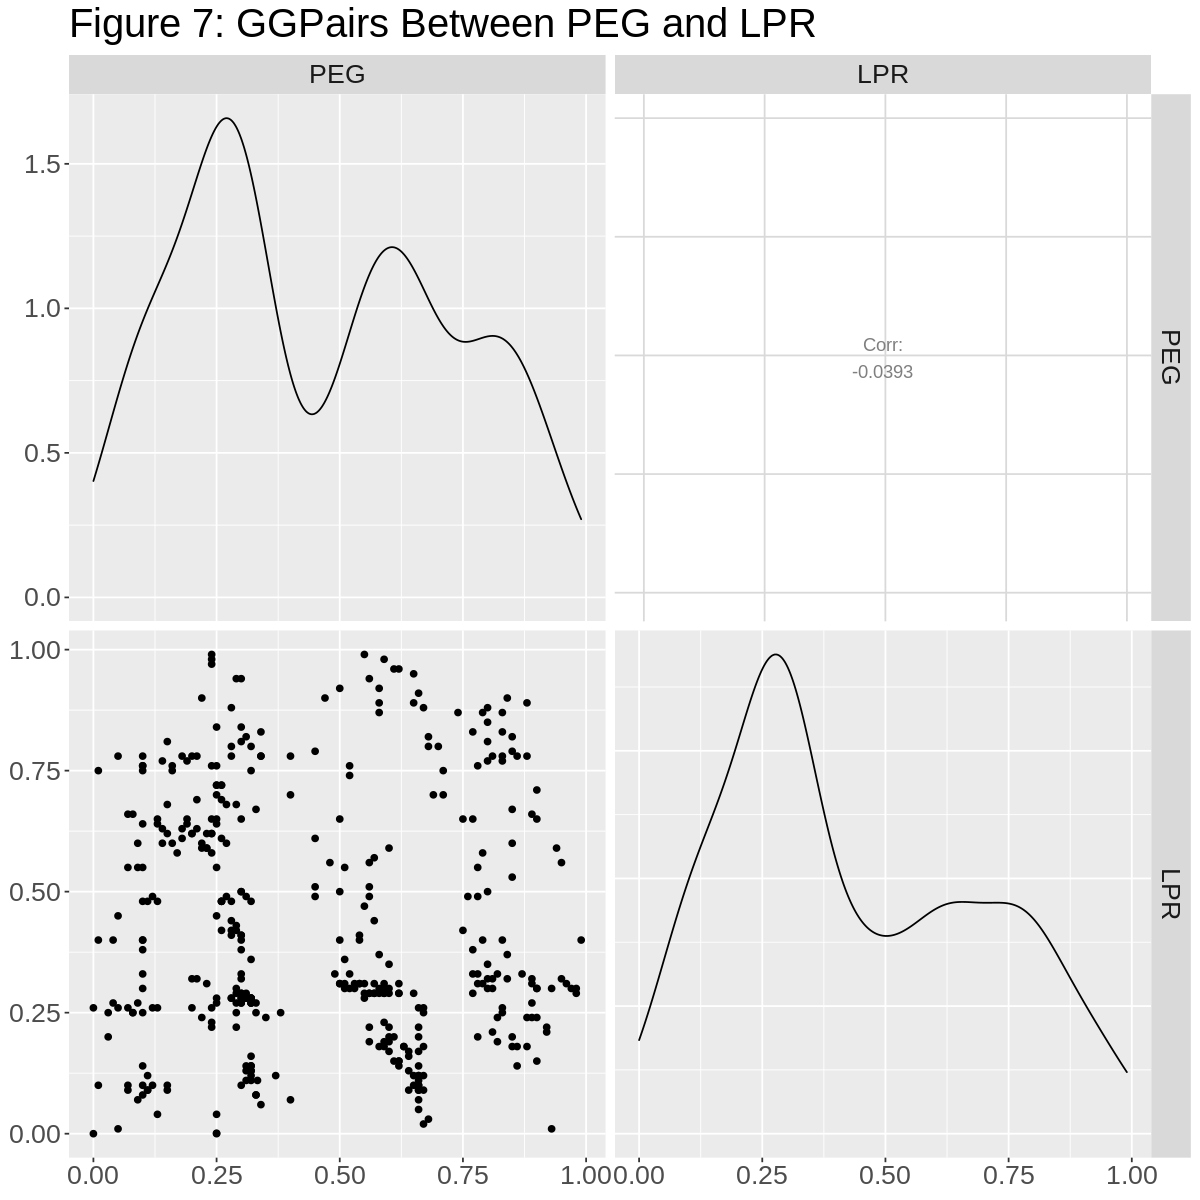

In [17]:
predictor_plot_pairs <- user_knowledge_data_randomized %>%
  select(PEG, LPR) %>%
  ggpairs() +
  ggtitle ("Figure 7: GGPairs Between PEG and LPR") +
  theme(text = element_text(size = 20))
predictor_plot_pairs

Discussion:

<li> Summary of results 
    
Results indicated PEG and LPR to be excellent predictors of UNS in a K-NN classification model with an accuracy of almost 94%. PEG was seen to be primarily rresponsible for this high classification accuracy, singularly giving a result of aalmost 84% in a K-NN model. LPR was thus found to be not as strong a predictor, but nonetheless increased accuracy by around 10%  from an already high accuracy, thus proving to be of significance. In "real world" terms, performance on examinations directly related to the subject matter was an excellent predictor of student knowledge level while exam performance of subjects related to the main subject matter was shown to have a definite impact as well.
    
<li> Discussion of Expectations 
    
We did expect student performance on subject matter related examinations (PEG) to be a good predictor of knowledge level as the examinations are directly designed to be assessments of student knowledge and student performance on the examinations is used to formally evaluate and classify student knowledge and learning outcomes. The effect of student performance on related items was interesting to see as we were not sure if knowledge and learning success would necessarily transfer between subjects. We had no particular expectations from the other attributes (update this proabably).
    
<li> Impact of Findings 
    
The findings reinforce the expectation that student success on subject matter examinations can be used to identify student knowledge and this can be used to gather demographics for targeted interventions aimed at helping struggling students succeed, through analysis of exam scores. Exam performance on related items also seems to play a factor thus learning success may transfer at least partially between subjects and this can be used to formulate unique learning strategies on a case to case basis drawing on students' experiences in other topics and identify knowledge assimilation strategies used by students with higher knowledge levels. The lack of strong predictive value of the other attributes can be used to inform an emphasis on certain aspects of the learning process and evaluate specific related processes and programs in the knowledge transfer process where resources are targeted but predicitive value is not found.
    
<li> Future Questions
    
A similar analysis could be conducted, excluding PEG and LPR, to identify which of the other attributes are comparatively better at predicting UNS.
    


<br><br>References: 

H. T. Kahraman, Sagiroglu, S., Colak, I., Developing intuitive knowledge classifier and modeling of users' domain dependent data in web, Knowledge Based Systems, vol. 37, pp. 283-295, 2013.

Zeina Bitar, Abbas Sandouk, Samih Al Jabi,
Testing the Performances of DC Series Motor Used in Electric Car,
Energy Procedia,
Volume 74,
2015,
Pages 148-159,
ISSN 1876-6102,
https://doi.org/10.1016/j.egypro.2015.07.536.
(https://www.sciencedirect.com/science/article/pii/S1876610215013041)



Group 002-08: Christopher Davis, Eashan Halbe, Moira Renata, Riley Lowe